### Problem 1

### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.
#### Sparkling dataset :
### 1. Read the data as an appropriate Time Series data and plot the data.
### Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('seaborn')
from pylab import rcParams
from sklearn import metrics
from warnings import filterwarnings
filterwarnings('ignore')

### Loading data in Data Frame

In [2]:
df_1= pd.read_csv('Sparkling.csv',parse_dates=True,squeeze=True,index_col=0)

### Checking head of the data

In [3]:
df_1.head()

YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
Name: Sparkling, dtype: int64

### Checking tail of the data

In [4]:
df_1.tail()

YearMonth
1995-03-01    1897
1995-04-01    1862
1995-05-01    1670
1995-06-01    1688
1995-07-01    2031
Name: Sparkling, dtype: int64

### Loading the data in another data frame

In [5]:
df_2= pd.read_csv('Sparkling.csv')

### Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [6]:
date= pd.date_range(start='1/1/1980',end='8/1/1995',freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [7]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df_2.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [8]:
df_2['Time_Stamp'] = pd.to_datetime(df_2['Time_Stamp'])

In [9]:
df = df_2.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Now, we have our data ready for the Time Series Analysis.

### Plot the Time Series to understand the behaviour of the data

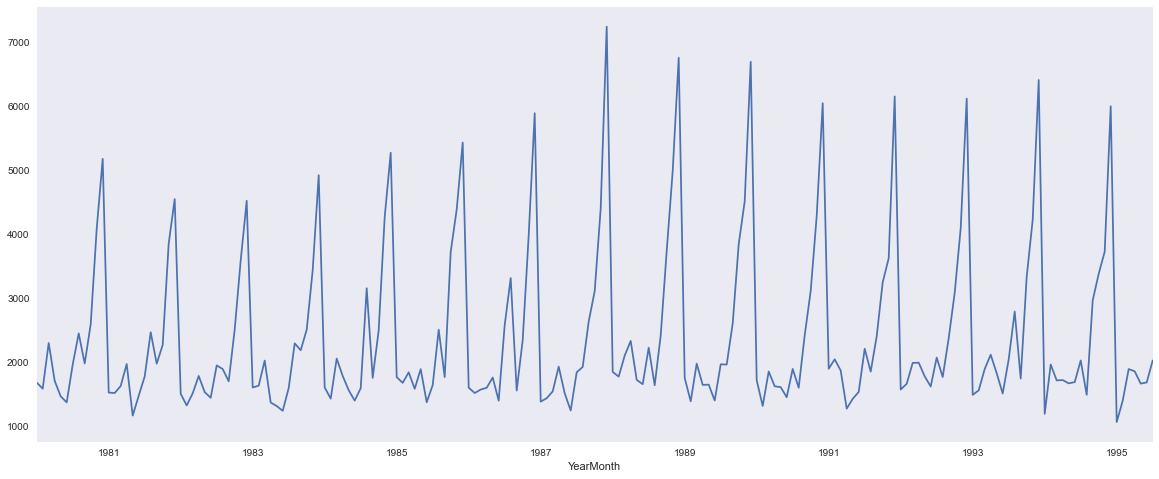

In [10]:
df_1.plot(figsize=(20,8))
plt.grid();

Text(0, 0.5, 'Units Sold')

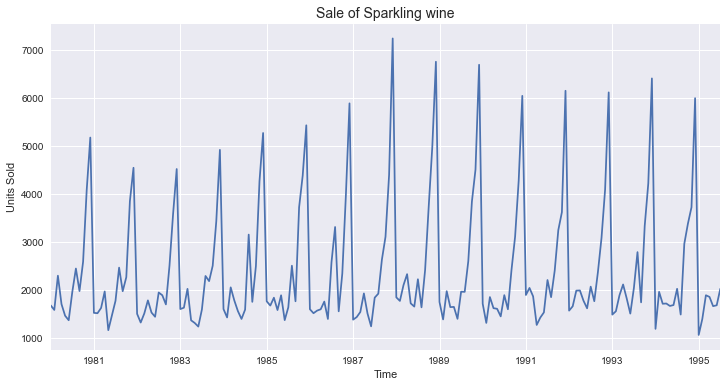

In [11]:
plt.figure(figsize = (12, 6))
df.Sparkling.plot()
plt.title('Sale of Sparkling wine', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

The plot shows some trend and seasonality in the given data. It also shows some higher levels of sales during the years 1987 – 1990.
### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.
### Check the basic measures of descriptive statistics

In [12]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

### Checking for missing values

In [13]:
df.isnull().sum()

Sparkling    0
dtype: int64

### Plot a boxplot to understand the spread of sales across different years and within different months across years.
### Yearly Boxplot

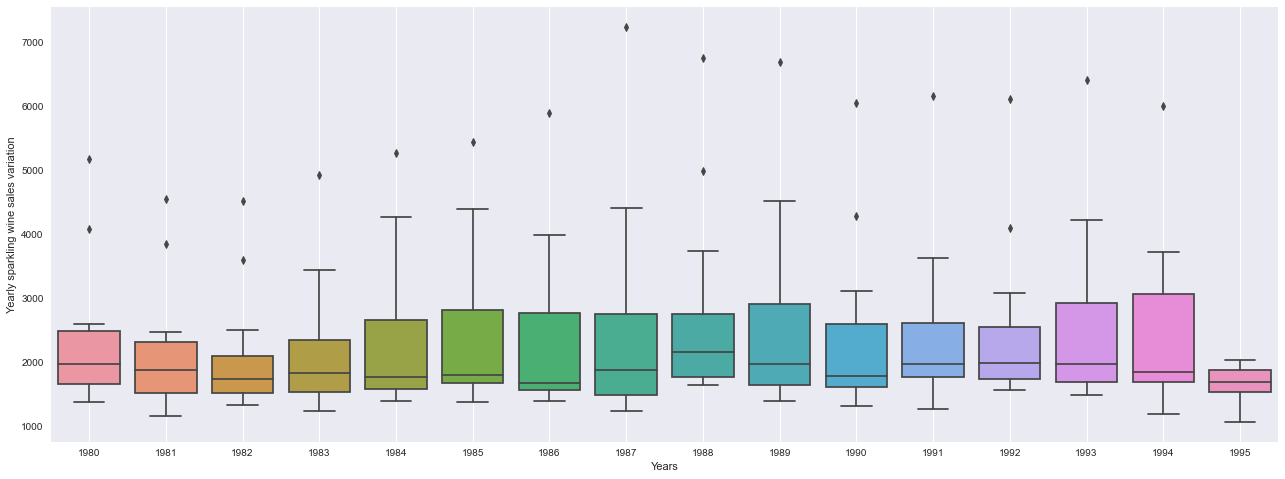

In [14]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly sparkling wine sales variation');

### Monthly plot

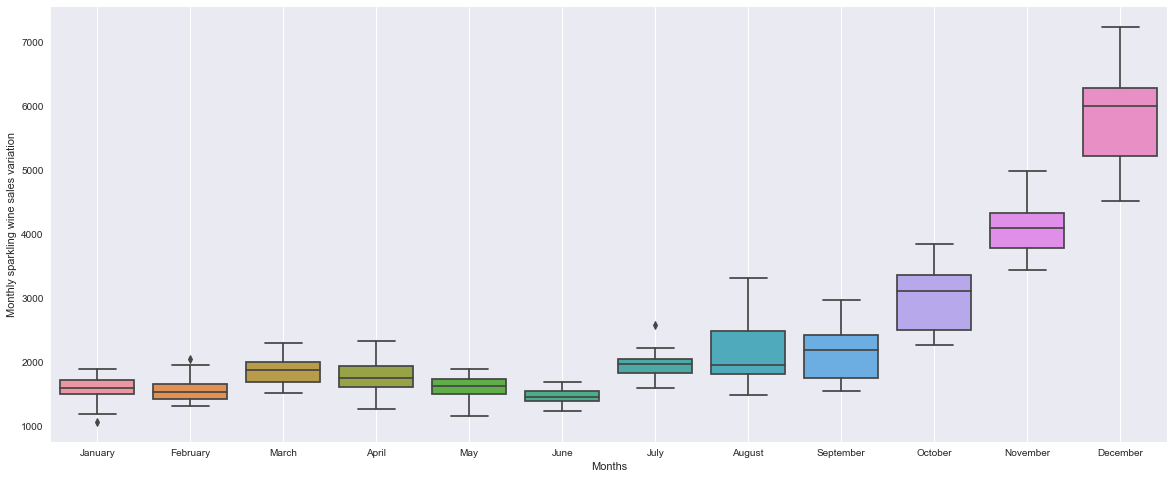

In [15]:
fig,ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=df.index.month_name(),y=df.values[:,0],ax=ax)
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly sparkling wine sales variation');

### Plot a time series monthplot to understand the spread of sales across different years and within different months across years.

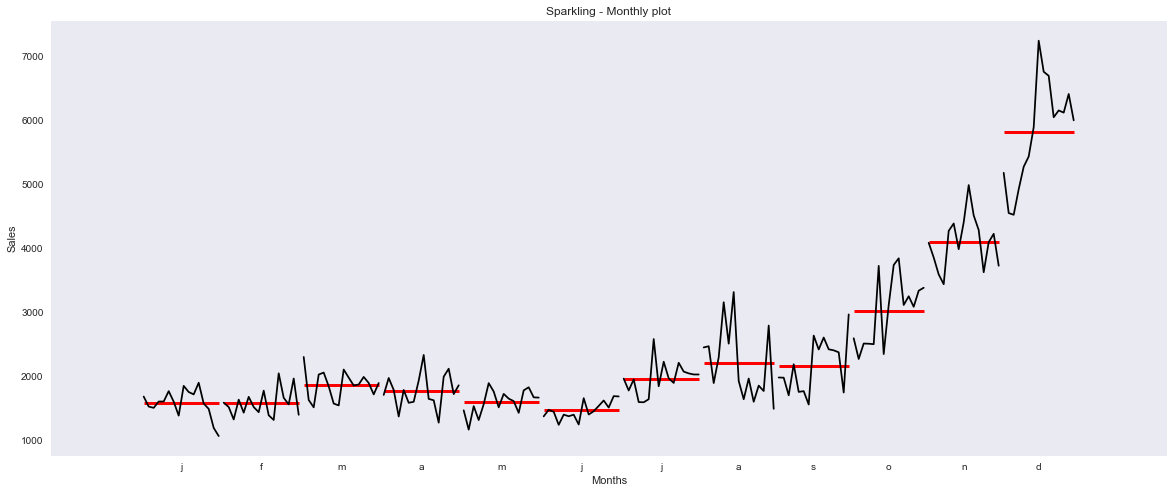

In [16]:
from statsmodels.graphics.tsaplots import month_plot
fig,ax = plt.subplots(figsize=(20,8))
month_plot(df['Sparkling'],ylabel='Sales',ax=ax)
plt.grid();
plt.xlabel('Months')
plt.title('Sparkling - Monthly plot');

The above plot shows the behavior of monthly 'Sparkling Wine Sales' across years
### Plot the Empirical Cumulative Distribution.

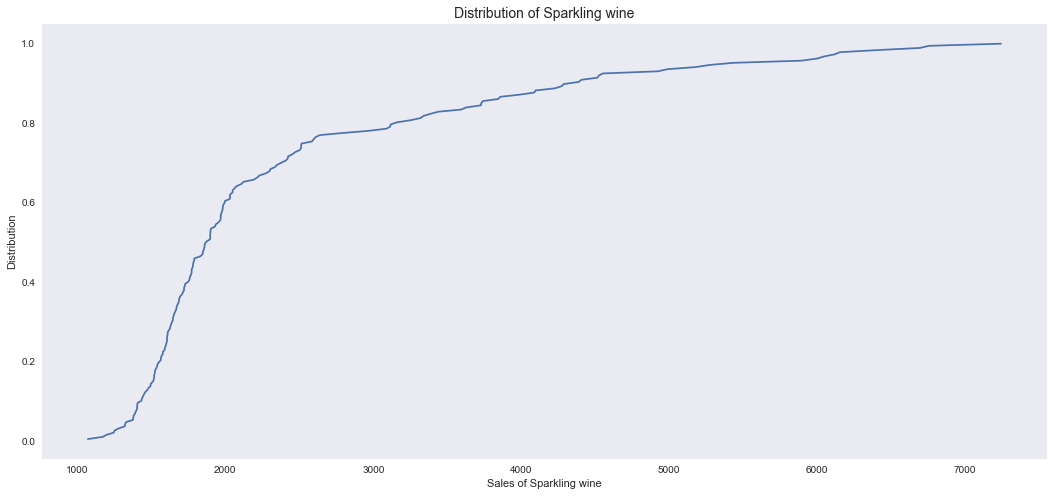

In [17]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid();
plt.title('Distribution of Sparkling wine', fontsize=14);
plt.xlabel('Sales of Sparkling wine');
plt.ylabel('Distribution');

The above graph is an Empirical Curve Distribution graph which shows us what percentage of data points are tied to what number of Sales

The Empirical CDF plot shows that, in 80% of months, at least 3000 units of Sparkling wine were sold

### Plot a graph of monthly sales across years.

In [18]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

Text(0.5, 1.0, 'Monthly sales over years')

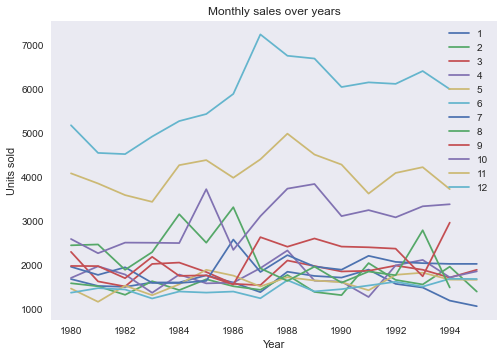

In [19]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');
plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title('Monthly sales over years')

- The monthly plot for Sparkling shows mean and variation of units sold each month over the years. Sale in seasonal months shows a higher variation than in the lean months.


- Sale in December with a mean few points below 6000, varies from 7400 to 4500 units over the years. Whereas sale in November varies from 3500 units to 5000 units and sale in October varies from 2500 to 4000 units


- The lean months from January till September shows more or less a consistent sale around 2000 units

### Plot the average sales per month and the month on month percentage change of sales.

Text(0.5, 0, 'Time')

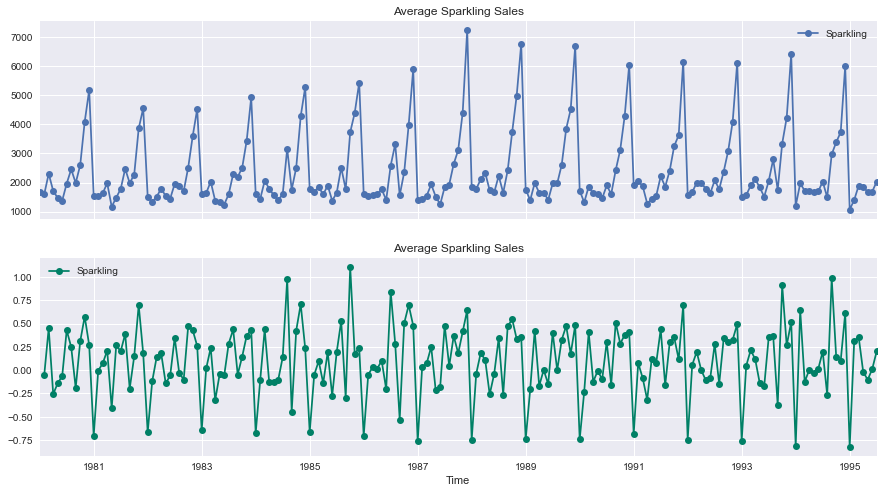

In [20]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Average Sparkling Sales",grid=True)
plt.xlabel('Time')


The above two graphs tell us the Average 'Sparkling' and the Percentage change of 'Sparkling' with respect to the time.
### Decompose the Time Series and plot the different components.

In [21]:
from statsmodels.tsa.seasonal import  seasonal_decompose

### Additive Decomposition

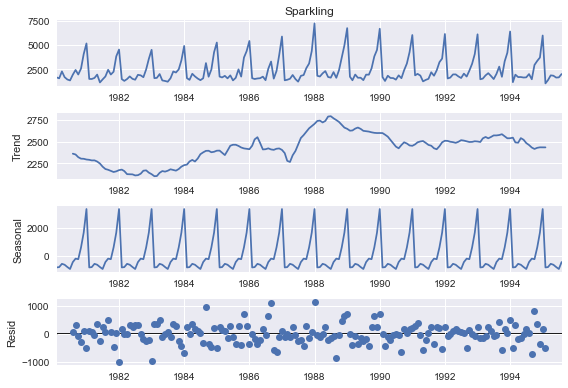

In [22]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

In [23]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

### Multiplicative Decomposition

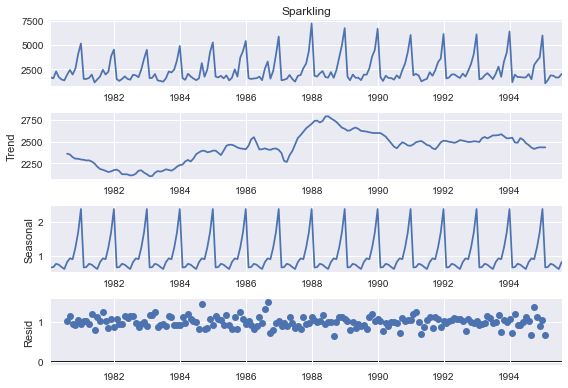

In [24]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [25]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

### 3. Split the data into training and test. The test data should start in 1991.
### Spliting the data into training and testing

In [26]:
train = df[df.index.year < 1991]
test = df[df.index.year >= 1991]

In [27]:
from IPython.display import display

In [28]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [29]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


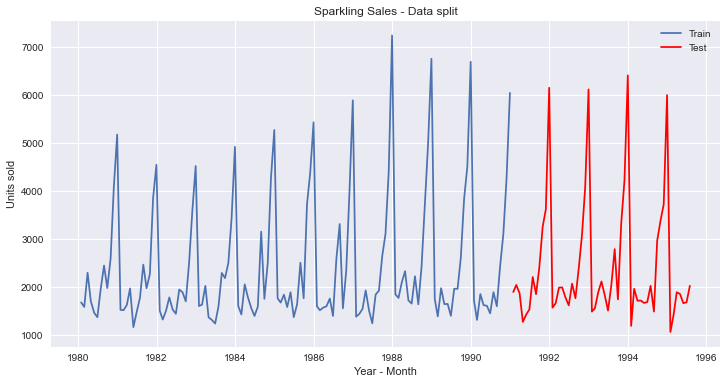

In [30]:
plt.figure(figsize = (12, 6))
plt.plot(train['Sparkling'], label = 'Train')
plt.plot(test['Sparkling'], label = 'Test', color='Red')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling Sales - Data split', fontsize = 12)
plt.show;

### 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.
### Model 1: Linear Regression

In [31]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [32]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [33]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

In [36]:
LinearRegression_train['time']

Time_Stamp
1980-01-31      1
1980-02-29      2
1980-03-31      3
1980-04-30      4
1980-05-31      5
             ... 
1990-08-31    128
1990-09-30    129
1990-10-31    130
1990-11-30    131
1990-12-31    132
Name: time, Length: 132, dtype: int64

In [37]:
LinearRegression_train['RegOnTime_spark'] = lr.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_spark'] = lr.predict(LinearRegression_test[['time']])

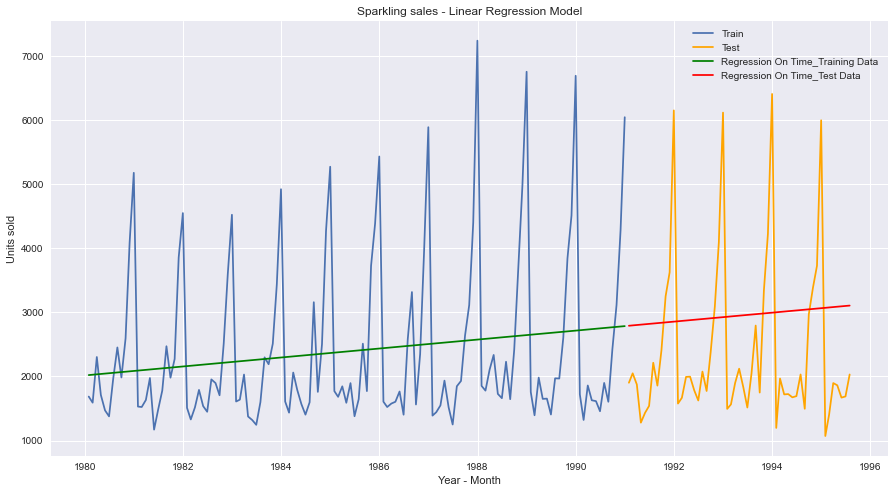

In [38]:
plt.figure(figsize=(15,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(LinearRegression_train['RegOnTime_spark'], label='Regression On Time_Training Data', color = 'green')
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression On Time_Test Data', color = 'red')
plt.legend(loc='best')
plt.xlabel('Year - Month');
plt.ylabel('Units sold');
plt.title('Sparkling sales - Linear Regression Model');

### Model Evaluation

In [39]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [40]:
from sklearn.metrics import mean_squared_error

# Training Data - RMSE and MAPE

rmse_spark_model1_train = metrics.mean_squared_error(train['Sparkling'],LinearRegression_train['RegOnTime_spark'],squared=False)
mape_spark_model1_train = MAPE(train['Sparkling'],LinearRegression_train['RegOnTime_spark'])
print("For RegressionOnTime forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model1_train, mape_spark_model1_train))

For RegressionOnTime forecast on the Sparkling Training Data:  RMSE is 1279.322 and MAPE is 40.05


In [41]:
# Testing Data - RMSE and MAPE

rmse_spark_model1_test = metrics.mean_squared_error(test['Sparkling'],LinearRegression_test['RegOnTime_spark'],squared=False)
mape_spark_model1_test = MAPE(test['Sparkling'],LinearRegression_test['RegOnTime_spark'])
print("For RegressionOnTime forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model1_test, mape_spark_model1_test))

For RegressionOnTime forecast on the Sparkling Testing Data:  RMSE is 1389.135 and MAPE is 50.15


In [42]:
spark_resultsDf = pd.DataFrame({'Test RMSE': [rmse_spark_model1_test],'Test MAPE': [mape_spark_model1_test]},index=['RegressionOnTime'])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15

### Model 2: Naive Approach

In [43]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [44]:
NaiveModel_train['spark_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['spark_naive'].head()

Time_Stamp
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: spark_naive, dtype: int64

In [45]:
NaiveModel_test['spark_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['spark_naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: spark_naive, dtype: int64

Text(0.5, 1.0, 'Sparkling - Naive Forecast')

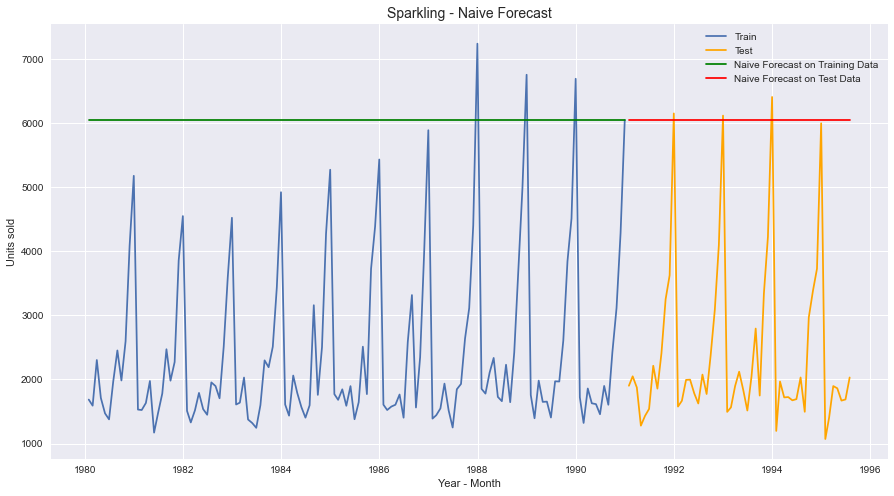

In [46]:
plt.figure(figsize=(15,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['spark_naive'], label='Naive Forecast on Training Data', color = 'green')
plt.plot(NaiveModel_test['spark_naive'], label='Naive Forecast on Test Data', color = 'red')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - Naive Forecast", fontsize = 14)

### Model Evauation

In [47]:
# Training Data - RMSE and MAPE

rmse_spark_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['spark_naive'],squared=False)
mape_spark_model2_train = MAPE(train['Sparkling'],NaiveModel_train['spark_naive'])
print("For Naive forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model2_train, mape_spark_model2_train))

For Naive forecast on the Sparkling Training Data:  RMSE is 3867.701 and MAPE is 153.17


In [48]:
# Testing Data - RMSE and MAPE

rmse_spark_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['spark_naive'],squared=False)
mape_spark_model2_test = MAPE(test['Sparkling'],NaiveModel_test['spark_naive'])
print("For Naive forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model2_test, mape_spark_model2_test))

For Naive forecast on the Sparkling Testing Data:  RMSE is 3864.279 and MAPE is 152.87


In [49]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model2_test],'Test MAPE': [mape_spark_model2_test]},index=['NaiveModel'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87

### Model 3: Simple Average

In [50]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [51]:
SimpleAverage_train['spark_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train['spark_mean_forecast'].head()

Time_Stamp
1980-01-31    2403.780303
1980-02-29    2403.780303
1980-03-31    2403.780303
1980-04-30    2403.780303
1980-05-31    2403.780303
Name: spark_mean_forecast, dtype: float64

In [52]:
SimpleAverage_test['spark_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test['spark_mean_forecast'].head()

Time_Stamp
1991-01-31    2403.780303
1991-02-28    2403.780303
1991-03-31    2403.780303
1991-04-30    2403.780303
1991-05-31    2403.780303
Name: spark_mean_forecast, dtype: float64

Text(0.5, 1.0, 'Sparkling - SimpleAverage Forecast')

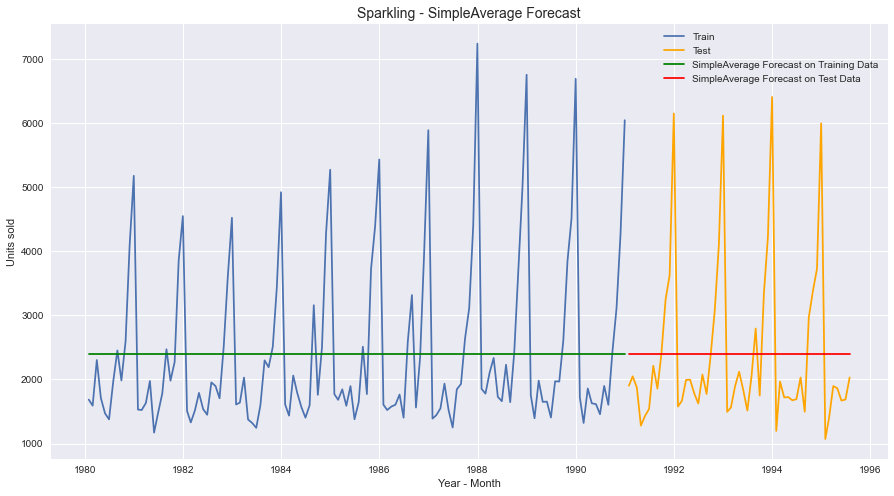

In [53]:
plt.figure(figsize=(15,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['spark_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'green')
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'red')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - SimpleAverage Forecast", fontsize=14)

### Model Evaluation

In [54]:
# Training Data - RMSE and MAPE

rmse_spark_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'],squared=False)
mape_spark_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'])
print("For Simple Average forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model3_train, mape_spark_model3_train))

For Simple Average forecast on the Sparkling Training Data:  RMSE is 1298.484 and MAPE is 40.36


In [55]:
# Testing Data - RMSE and MAPE

rmse_spark_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'],squared=False)
mape_spark_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'])
print("For Simple Average forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model3_test, mape_spark_model3_test))

For Simple Average forecast on the Sparkling Testing Data:  RMSE is 1275.082 and MAPE is 38.90


In [56]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model3_test],'Test MAPE': [mape_spark_model3_test]},index=['SimpleAverage'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87
SimpleAverage     1275.081804      38.90

### Model 4: Moving Average
For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.


For Moving Average, we are going to average over the entire data.

In [57]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

#### Trailing moving averages

In [58]:
MovingAverage['Spark_Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Spark_Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Spark_Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Spark_Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Spark_Trailing_2  Spark_Trailing_4  Spark_Trailing_6  \
Time_Stamp                                                                    
1980-01-31       1686               NaN               NaN               NaN   
1980-02-29       1591            1638.5               NaN               NaN   
1980-03-31       2304            1947.5               NaN               NaN   
1980-04-30       1712            2008.0           1823.25               NaN   
1980-05-31       1471            1591.5           1769.50               NaN   

            Spark_Trailing_9  
Time_Stamp                    
1980-01-31               NaN  
1980-02-29               NaN  
1980-03-31               NaN  
1980-04-30               NaN  
1980-05-31               NaN

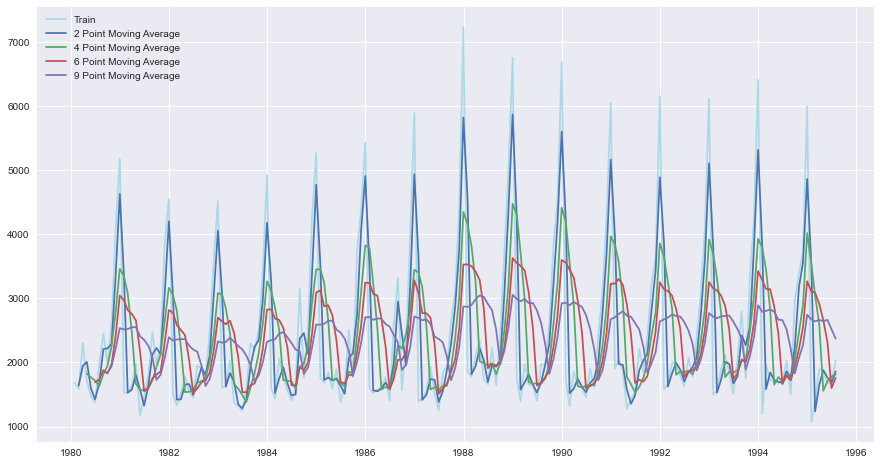

In [59]:
plt.figure(figsize=(15,8))
plt.plot(MovingAverage['Sparkling'], label='Train', color='lightblue')
plt.plot(MovingAverage['Spark_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')

In [60]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

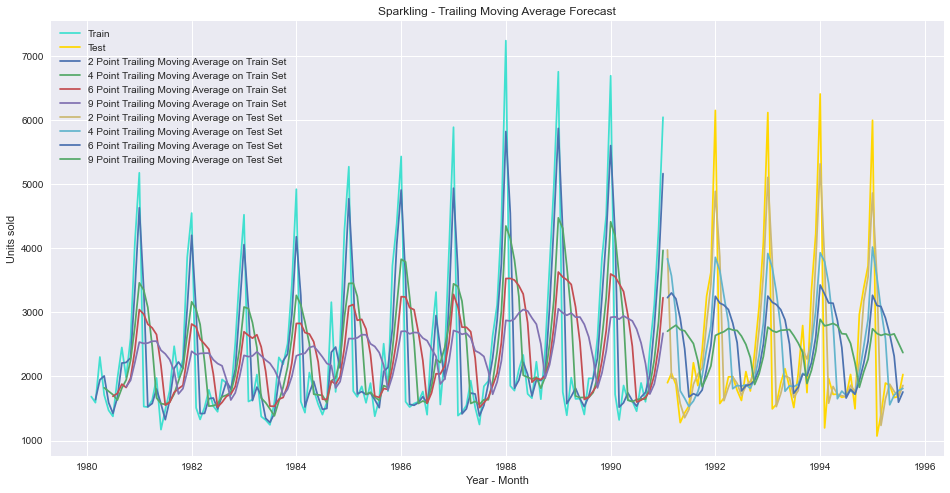

In [61]:
# Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train', color = 'turquoise')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')

plt.xlabel('Year - Month');
plt.ylabel('Units sold');

plt.title("Sparkling - Trailing Moving Average Forecast");

### Model Evaluation

In [62]:
## Test Data - rmse_spark and mape_spark --> 2 point Spark_Trailing MA

rmse_spark_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'],squared=False)
mape_spark_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_2, mape_spark_model4_test_2))

## Test Data - rmse_spark and mape_spark --> 4 point Spark_Trailing MA

rmse_spark_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'],squared=False)
mape_spark_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_4, mape_spark_model4_test_4))

## Test Data - rmse_spark and mape_spark --> 6 point Spark_Trailing MA

rmse_spark_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'],squared=False)
mape_spark_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_6, mape_spark_model4_test_6))

## Test Data - rmse_spark and mape_spark --> 9 point Spark_Trailing MA

rmse_spark_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'],squared=False)
mape_spark_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_9, mape_spark_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is 813.401 mape_spark is 19.70
For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is 1156.590 mape_spark is 35.96
For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is 1283.927 mape_spark is 43.86
For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is 1346.278 mape_spark is 46.86


In [63]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_spark_model4_test_2,rmse_spark_model4_test_4
                                          ,rmse_spark_model4_test_6,rmse_spark_model4_test_9]
                            ,'Test MAPE': [mape_spark_model4_test_2,mape_spark_model4_test_4,
                                           mape_spark_model4_test_6,mape_spark_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_4])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87
SimpleAverage     1275.081804      38.90
2 point TMA        813.400684      19.70
4 point TMA       1156.589694      35.96
6 point TMA       1283.927428      43.86
9 point TMA       1346.278315      46.86

### Model 5: Simple Exponential Smoothing

In [64]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [65]:
SES_train = train.copy()
SES_test = test.copy()

In [66]:
model = SimpleExpSmoothing(np.asarray(SES_train['Sparkling']))

In [67]:
model_SES_autofit = model.fit(optimized=True,use_brute=True)

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [68]:
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [69]:
SES_train['predict_spark'] = model_SES_autofit.fittedvalues
SES_train.head()

Sparkling  predict_spark
Time_Stamp                          
1980-01-31       1686    1818.535750
1980-02-29       1591    1811.961001
1980-03-31       2304    1800.999709
1980-04-30       1712    1825.952226
1980-05-31       1471    1820.299357

In [70]:
SES_test['predict_spark'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

Sparkling  predict_spark
Time_Stamp                          
1991-01-31       1902    2724.932624
1991-02-28       2049    2724.932624
1991-03-31       1874    2724.932624
1991-04-30       1279    2724.932624
1991-05-31       1432    2724.932624

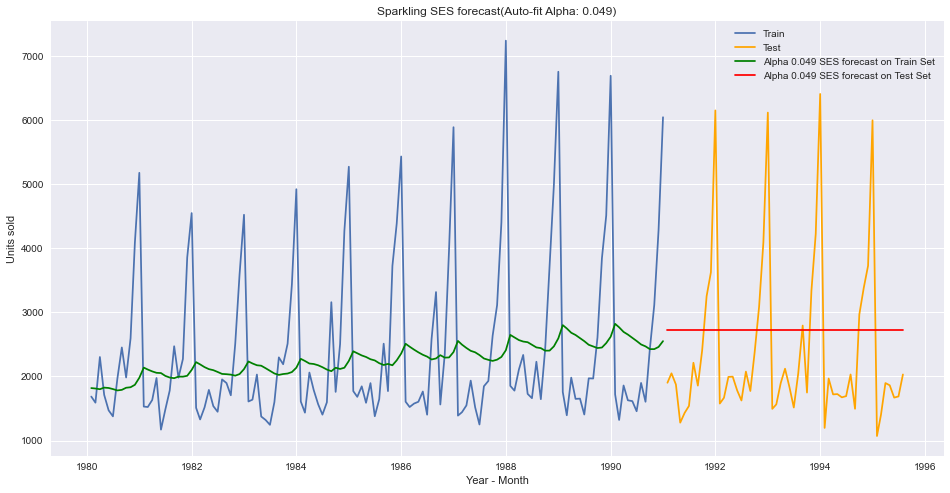

In [71]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test', color = 'orange')

plt.plot(SES_train['predict_spark'],color = 'green', label='Alpha 0.049 SES forecast on Train Set')
plt.plot(SES_test['predict_spark'],color = 'red', label='Alpha 0.049 SES forecast on Test Set')

plt.legend(loc='best')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling SES forecast(Auto-fit Alpha: 0.049)');



### Model Evaluation

In [72]:
# Training Data - RMSE and MAPE

rmse_spark_model5_train = metrics.mean_squared_error(train['Sparkling'],SES_train['predict_spark'],squared=False)
mape_spark_model5_train = MAPE(train['Sparkling'],SES_train['predict_spark'])
print("For SES forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_train, mape_spark_model5_train))

For SES forecast on the Sparkling Training Data:  RMSE is 1315.232 and MAPE is 39.92


In [73]:
# Testing Data - RMSE and MAPE

rmse_spark_model5_test = metrics.mean_squared_error(test['Sparkling'],SES_test['predict_spark'],squared=False)
mape_spark_model5_test = MAPE(test['Sparkling'],SES_test['predict_spark'])
print("For SES forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_test, mape_spark_model5_test))

For SES forecast on the Sparkling Testing Data:  RMSE is 1316.035 and MAPE is 45.47


In [74]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_spark_model5_test],'Test MAPE': [mape_spark_model5_test]},index=['SES Alpha 0.049'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_5])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87
SimpleAverage     1275.081804      38.90
2 point TMA        813.400684      19.70
4 point TMA       1156.589694      35.96
6 point TMA       1283.927428      43.86
9 point TMA       1346.278315      46.86
SES Alpha 0.049   1316.035487      45.47

### Model 6: Double Exponential Smoothing (Holt's Model)

In [75]:
DES_train = train.copy()
DES_test = test.copy()

In [76]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [77]:
resultsDf_6 = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[],
                            'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict_spark',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict_spark',i,j] = model_DES_alpha_i_j.forecast(len(test['Sparkling']))
        
        rmse_spark_model6_train = np.round(metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict_spark',i,j],squared=False),2)
        mape_spark_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict_spark',i,j])
        
        rmse_spark_model6_test = np.round(metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',i,j],squared=False),2)
        mape_spark_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict_spark',i,j])
        
        resultsDf_6 = resultsDf_6.append({'Alpha':i,'Beta':j,
                                          'Train RMSE':rmse_spark_model6_train ,'Train MAPE': mape_spark_model6_train,
                                          'Test RMSE':rmse_spark_model6_test ,'Test MAPE':mape_spark_model6_test}, 
                                         ignore_index=True)

In [78]:
resultsDf_6.sort_values(by=['Test RMSE']).head(3)

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1     1363.47       44.26    1779.42      67.23
1     0.1   0.2     1398.19       45.61    2601.54      95.50
10    0.2   0.1     1412.03       46.62    3611.77     135.41

In [79]:
resultsDf_6.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1     1363.47       44.26    1779.42      67.23
1     0.1   0.2     1398.19       45.61    2601.54      95.50
10    0.2   0.1     1412.03       46.62    3611.77     135.41
2     0.1   0.3     1431.37       46.90    4288.43     155.25
3     0.1   0.4     1466.77       48.27    6042.38     219.09

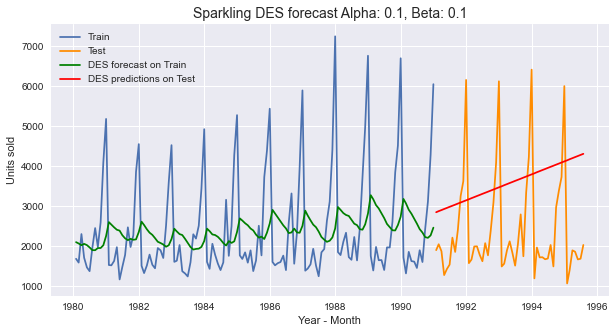

In [80]:
plt.figure(figsize=(10,5))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_spark', 0.1, 0.1], color = 'green', label='DES forecast on Train')
plt.plot(DES_test['predict_spark', 0.1, 0.1], color = 'red', label='DES predictions on Test')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling DES forecast Alpha: 0.1, Beta: 0.1', fontsize=14)
plt.legend(loc='best')

#### Trying auto fit by the model

In [81]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [82]:
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [83]:
alpha = model_DES_autofit.params['smoothing_level']
beta = model_DES_autofit.params['smoothing_trend']
alpha_6_1 = alpha
beta_6_1 = beta

In [84]:
DES_train['predict_spark',alpha,beta] = model_DES_autofit.fittedvalues
DES_test['predict_spark',alpha,beta] = model_DES_autofit.forecast(len(test['Sparkling']))

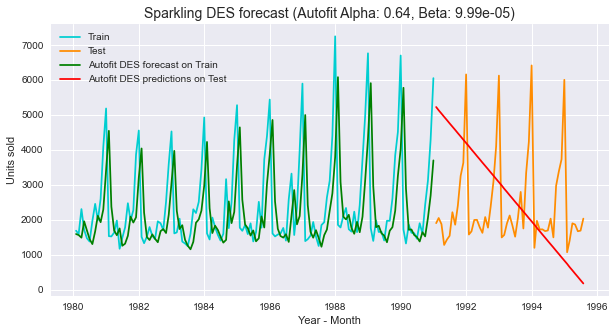

In [85]:
plt.figure(figsize=(10,5))
plt.plot(DES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_spark',alpha,beta], color = 'green', label='Autofit DES forecast on Train')
plt.plot(DES_test['predict_spark',alpha,beta], color = 'red', label='Autofit DES predictions on Test')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling DES forecast (Autofit Alpha: 0.64, Beta: 9.99e-05)', fontsize=14);
plt.legend(loc='best')

In [86]:
rmse_spark_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict_spark',alpha,beta],squared=False)
mape_spark_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict_spark',alpha,beta])
        
rmse_spark_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta],squared=False)
mape_spark_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta])

resultsDf_6 = resultsDf_6.append({'Alpha':alpha,'Beta':beta,'Train RMSE':rmse_spark_model6_train
                                      ,'Train MAPE': mape_spark_model6_train,'Test RMSE':rmse_spark_model6_test
                                      ,'Test MAPE':mape_spark_model6_test}, ignore_index=True)

In [87]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha    Beta  Train RMSE  Train MAPE    Test RMSE  Test MAPE
0    0.100000  0.1000  1363.47000       44.26  1779.420000      67.23
100  0.688571  0.0001  1349.65046       39.23  2007.238526      68.23
1    0.100000  0.2000  1398.19000       45.61  2601.540000      95.50
10   0.200000  0.1000  1412.03000       46.62  3611.770000     135.41
2    0.100000  0.3000  1431.37000       46.90  4288.430000     155.25

In [88]:
resultsDf_6.sort_values(by=['Test MAPE']).head()

Alpha    Beta  Train RMSE  Train MAPE    Test RMSE  Test MAPE
0    0.100000  0.1000  1363.47000       44.26  1779.420000      67.23
100  0.688571  0.0001  1349.65046       39.23  2007.238526      68.23
1    0.100000  0.2000  1398.19000       45.61  2601.540000      95.50
10   0.200000  0.1000  1412.03000       46.62  3611.770000     135.41
2    0.100000  0.3000  1431.37000       46.90  4288.430000     155.25

### Model Evaluation

In [89]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][100]],
                              'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][100]]}
                           ,index=['DES Alpha 0.1,Beta 0.1','DES Alpha 0.6,Beta 9.99e-05'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_6_1])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime             1389.135175      50.15
NaiveModel                   3864.279352     152.87
SimpleAverage                1275.081804      38.90
2 point TMA                   813.400684      19.70
4 point TMA                  1156.589694      35.96
6 point TMA                  1283.927428      43.86
9 point TMA                  1346.278315      46.86
SES Alpha 0.049              1316.035487      45.47
DES Alpha 0.1,Beta 0.1       1779.420000      67.23
DES Alpha 0.6,Beta 9.99e-05  2007.238526      68.23

### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)
#### Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [90]:
TES_train = train.copy()
TES_test = test.copy()

In [91]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [92]:
resultsDf_7_1 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict_spark',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_spark',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test['Sparkling']))
        
            rmse_spark_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_spark',i,j,k],squared=False)
            mape_spark_model7_train = MAPE(TES_train['Sparkling'],TES_train['predict_spark',i,j,k])
        
            rmse_spark_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_spark',i,j,k],squared=False)
            mape_spark_model7_test = MAPE(TES_test['Sparkling'],TES_test['predict_spark',i,j,k])
        
            resultsDf_7_1 = resultsDf_7_1.append({'Alpha':i,'Beta':j,'Gamma':k,'Train RMSE':rmse_spark_model7_train
                                      ,'Train MAPE': mape_spark_model7_train,'Test RMSE':rmse_spark_model7_test
                                      ,'Test MAPE': mape_spark_model7_test}, ignore_index=True)

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: O

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: O

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: O

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: O

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: O

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: O

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: O

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: O

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: O

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: O

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [93]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
211    0.3   0.2    0.2  378.189776       11.28  314.882349      10.10
301    0.4   0.1    0.2  373.815525       11.13  315.533374      10.41
300    0.4   0.1    0.1  371.341930       11.14  318.045761      10.24
402    0.5   0.1    0.3  390.175608       11.54  325.545203       9.99
30     0.1   0.4    0.1  403.937167       11.72  330.772119      10.56

In [94]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
402    0.5   0.1    0.3  390.175608       11.54  325.545203       9.99
211    0.3   0.2    0.2  378.189776       11.28  314.882349      10.10
300    0.4   0.1    0.1  371.341930       11.14  318.045761      10.24
301    0.4   0.1    0.2  373.815525       11.13  315.533374      10.41
30     0.1   0.4    0.1  403.937167       11.72  330.772119      10.56

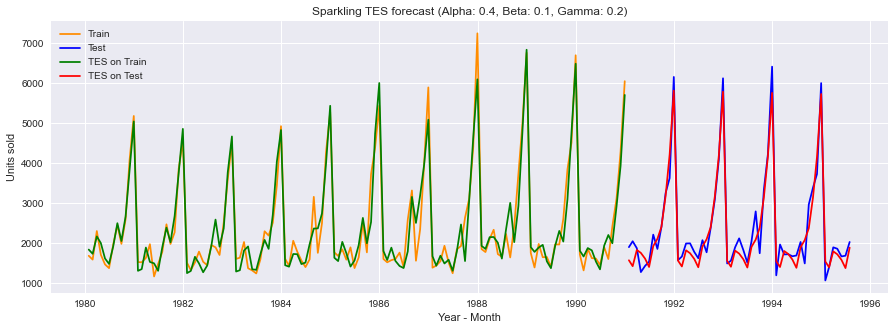

In [95]:
plt.figure(figsize=(15,5))
plt.plot(TES_train['Sparkling'], label='Train', color = 'darkorange')
plt.plot(TES_test['Sparkling'], label='Test', color = 'blue')

plt.plot(TES_train['predict_spark', 0.4, 0.1, 0.2], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_spark', 0.4, 0.1, 0.2], color='red', label='TES on Test')


plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Alpha: 0.4, Beta: 0.1, Gamma: 0.2)')

plt.legend(loc='best')


#### Autofit model of TES

In [96]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [97]:
model_TES_autofit.params

{'smoothing_level': 0.111108139467838,
 'smoothing_trend': 0.06172875597197263,
 'smoothing_seasonal': 0.3950479631147446,
 'damping_trend': nan,
 'initial_level': 1639.9340657558994,
 'initial_trend': -12.22494561218149,
 'initial_seasons': array([1.06402008, 1.02352078, 1.40671876, 1.20165543, 0.97593   ,
        0.97100155, 1.31897446, 1.69588922, 1.3895294 , 1.81476396,
        2.85150039, 3.62470528]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [98]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_trend']
gamma = model_TES_autofit.params['smoothing_seasonal']
alpha_7_1 = alpha
beta_7_1 = beta
gamma_7_1 = gamma

In [99]:
TES_train['predict_spark',alpha,beta,gamma] = model_TES_autofit.fittedvalues
TES_test['predict_spark',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test['Sparkling']))

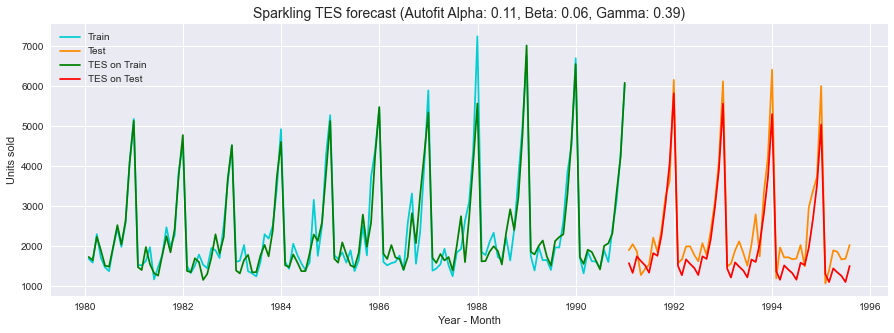

In [100]:
plt.figure(figsize=(15,5))

plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_spark',alpha,beta,gamma], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_spark',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Autofit Alpha: 0.11, Beta: 0.06, Gamma: 0.39)', fontsize=14)

plt.legend(loc='best')

In [101]:
rmse_spark_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_spark',alpha,beta,gamma],squared=False)
mape_spark_model7_train = MAPE(TES_train['Sparkling'],TES_train['predict_spark',alpha,beta,gamma])
        
rmse_spark_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_spark',alpha,beta,gamma],squared=False)
mape_spark_model7_test = MAPE(TES_test['Sparkling'],TES_test['predict_spark',alpha,beta,gamma])
        
resultsDf_7_1 = resultsDf_7_1.append({'Alpha':np.round(alpha,2),'Beta':np.round(beta,2),'Gamma':np.round(gamma,2),'Train RMSE':rmse_spark_model7_train
                                      ,'Train MAPE': mape_spark_model7_train,'Test RMSE':rmse_spark_model7_test
                                      ,'Test MAPE': mape_spark_model7_test}, ignore_index=True)

In [102]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
211    0.3   0.2    0.2  378.189776       11.28  314.882349      10.10
301    0.4   0.1    0.2  373.815525       11.13  315.533374      10.41
300    0.4   0.1    0.1  371.341930       11.14  318.045761      10.24
402    0.5   0.1    0.3  390.175608       11.54  325.545203       9.99
30     0.1   0.4    0.1  403.937167       11.72  330.772119      10.56

In [103]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
402    0.5   0.1    0.3  390.175608       11.54  325.545203       9.99
211    0.3   0.2    0.2  378.189776       11.28  314.882349      10.10
300    0.4   0.1    0.1  371.341930       11.14  318.045761      10.24
301    0.4   0.1    0.2  373.815525       11.13  315.533374      10.41
30     0.1   0.4    0.1  403.937167       11.72  330.772119      10.56

### Model Evaluation

In [104]:
resultsDf_7_sp = pd.DataFrame({'Test RMSE': [resultsDf_7_1['Test RMSE'][301],resultsDf_7_1['Test RMSE'][1000]],
                              'Test MAPE': [resultsDf_7_1['Test MAPE'][301],resultsDf_7_1['Test MAPE'][1000]]}
                           ,index=['TES Alpha 0.4, Beta 0.1, Gamma 0.2','TES Alpha 0.11, Beta 0.06, Gamma 0.39'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_7_sp])
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
TES Alpha 0.11, Beta 0.06, Gamma 0.39   469.767970      16.40
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
SimpleAverage                          1275.081804      38.90
6 point TMA                            1283.927428      43.86
SES Alpha 0.049                        1316.035487      45.47
9 point TMA                            1346.278315      46.86
RegressionOnTime                       1389.135175      50.15
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 9.99e-05            2007.238526      68.23
NaiveModel                             3864.279352     152.87

### Ploting all the above models

Text(0.5, 1.0, 'SPARKLING : Forecast Vs Actual Test set')

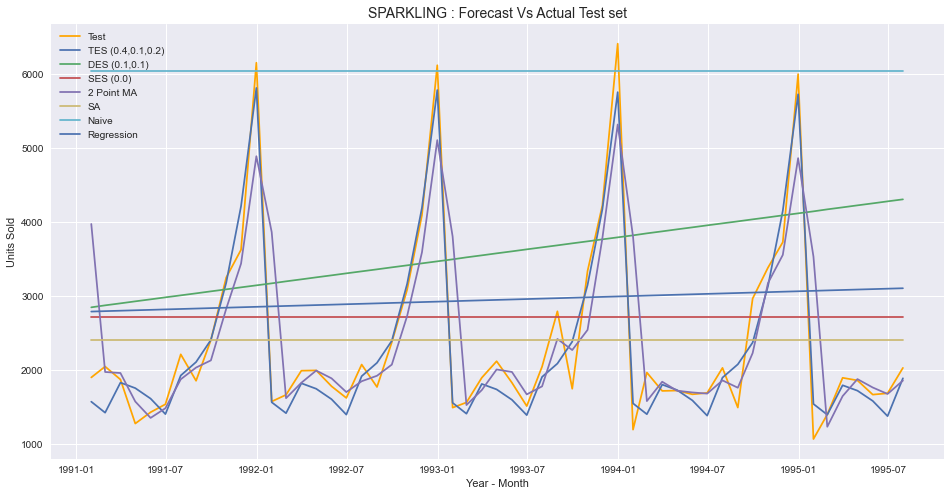

In [105]:
plt.figure(figsize=(16,8))

plt.plot(TES_test['Sparkling'], label='Test', color = 'orange')
#TES
plt.plot(TES_test['predict_spark',0.4,0.1,0.2],  label='TES (0.4,0.1,0.2)')
#DES
plt.plot(DES_test['predict_spark',0.1,0.1],  label='DES (0.1,0.1)')
#SES
plt.plot(SES_test['predict_spark'],  label='SES (0.0)')
#MA
plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['spark_naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Year - Month')
plt.ylabel('Units Sold')
plt.title('SPARKLING : Forecast Vs Actual Test set', fontsize=14)

### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
#### Note: Stationarity should be checked at alpha = 0.05.

The Augmented Dicky-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [106]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

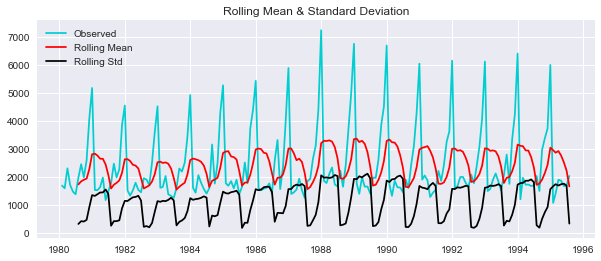

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [107]:
plt.figure(figsize=(10,4))
test_stationarity(df['Sparkling'],'darkturquoise')

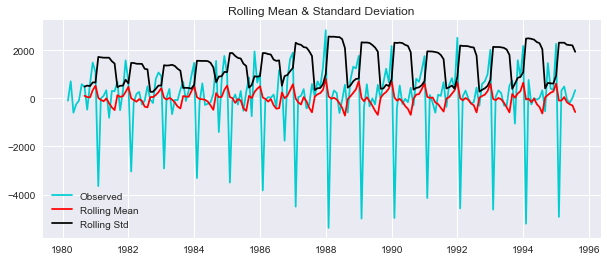

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [108]:
plt.figure(figsize=(10,4))
test_stationarity(df['Sparkling'].diff().dropna(),'darkturquoise')

We see that at 5% significant level the Time Series is non-stationary. But the seasonality is multiplicative as the Std deviation and mean varies according to the change in trend

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

Difference of original series

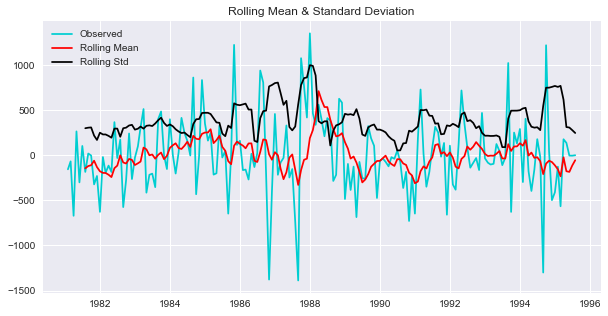

Results of Dickey-Fuller Test:
Test Statistic                  -4.460165
p-value                          0.000232
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [109]:
plt.figure(figsize=(10,5))
test_stationarity(df['Sparkling'].diff(12).dropna(), 'darkturquoise')

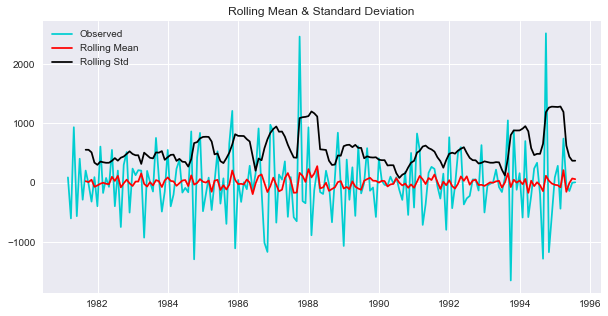

Results of Dickey-Fuller Test:
Test Statistic                  -5.113533
p-value                          0.000013
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [110]:
plt.figure(figsize=(10,5))
test_stationarity((df['Sparkling'].diff(12).dropna()).diff().dropna(), 'darkturquoise')

We see that at 

$\alpha$ = 0.05 the Time Series is indeed stationary. But seasonality is multiplicative

Log of series

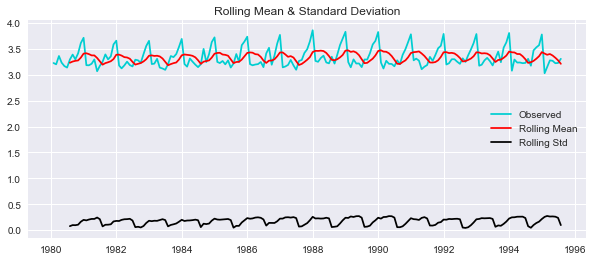

Results of Dickey-Fuller Test:
Test Statistic                  -1.749630
p-value                          0.405740
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [111]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Sparkling']), 'darkturquoise')

Seasonality is now additive but non stationary

Difference of log of series

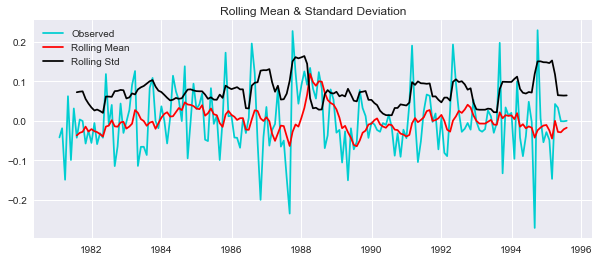

Results of Dickey-Fuller Test:
Test Statistic                  -5.183811
p-value                          0.000009
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [112]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Sparkling']).diff(12).dropna(),  'darkturquoise')

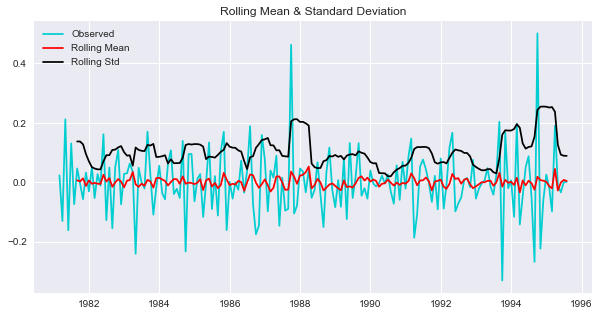

Results of Dickey-Fuller Test:
Test Statistic                  -5.254601
p-value                          0.000007
#Lags Used                      12.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64 



In [113]:
plt.figure(figsize=(10,5)) 
test_stationarity((np.log10(df['Sparkling']).diff(12).dropna()).diff().dropna(),  'darkturquoise')

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.
### ACF plots :

In [114]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 720x360 with 0 Axes>

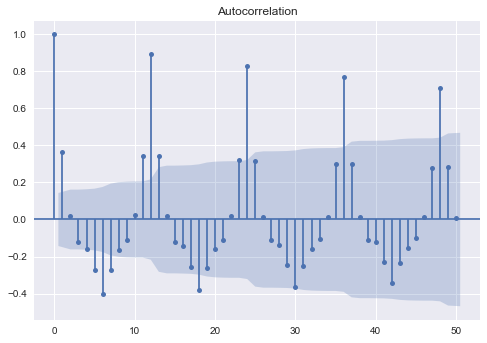

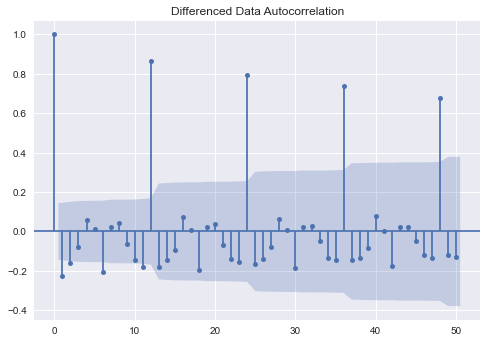

In [115]:
plt.figure(figsize=(10,5))
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

### PACF Plots

<Figure size 720x360 with 0 Axes>

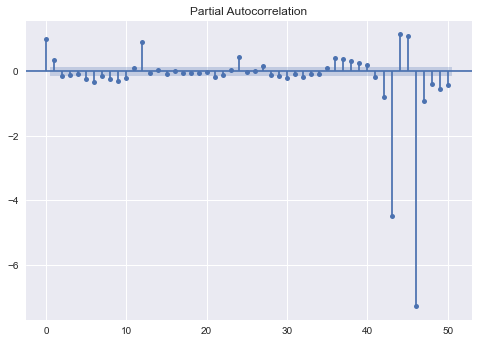

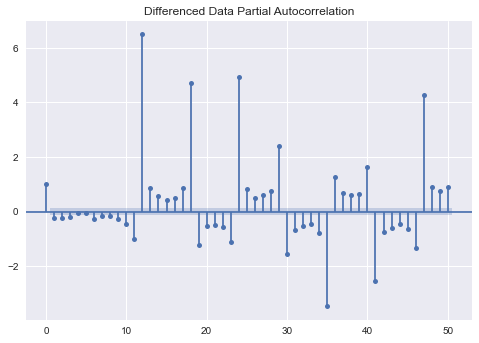

In [116]:
plt.figure(figsize=(10,5))
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.
### AUTO SARIMA on original data
#### As the data contains seasonality component we will be building SARIMA model, rather than ARIMA.

In [117]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

In [118]:
import itertools
p = q = range(0,4)
d= range(1,2)
D = range(1,2)

pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [119]:
SARIMA_AIC_spark = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [120]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark = SARIMA_model_spark.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark.aic))
        SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1822.9824851895298
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1626.8626334678963
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1452.6773574254655


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:3674.47213844243
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1646.377816766144
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1628.32439081859
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1454.5289621306997


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:3651.0520407082845
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1468.500098186662
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1455.9911553648092


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:3833.95719154272
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:1289.2398197439918
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:1291.2448875094105
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:1288.6070380293436
SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:4686.533701863075
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1760.6565719828523
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.6639234230142
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:1399.108384667984


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 1, 3, 12)7 - AIC:3610.548715688111
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:1602.8594819023883
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:1570.8550259195656
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:1400.6709524137377


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 1, 3, 12)7 - AIC:3485.854796023165
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:1428.2448811159443
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:1429.6168027963352
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:1402.63858885066


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 1, 3, 12)7 - AIC:3169.1161897837032
SARIMA(0, 1, 1)x(3, 1, 0, 12)7 - AIC:1255.5784542932213
SARIMA(0, 1, 1)x(3, 1, 1, 12)7 - AIC:1257.4558568590317
SARIMA(0, 1, 1)x(3, 1, 2, 12)7 - AIC:1258.292512556489


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 1, 3, 12)7 - AIC:3899.980092997547
SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC:1741.3207220431611
SARIMA(0, 1, 2)x(0, 1, 1, 12)7 - AIC:1554.7429039622837
SARIMA(0, 1, 2)x(0, 1, 2, 12)7 - AIC:1382.4842540785407


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 1, 3, 12)7 - AIC:3308.220630872158
SARIMA(0, 1, 2)x(1, 1, 0, 12)7 - AIC:1601.7587293000731
SARIMA(0, 1, 2)x(1, 1, 1, 12)7 - AIC:1556.1559716161537
SARIMA(0, 1, 2)x(1, 1, 2, 12)7 - AIC:1384.3988672022253
SARIMA(0, 1, 2)x(1, 1, 3, 12)7 - AIC:2978.387403973672
SARIMA(0, 1, 2)x(2, 1, 0, 12)7 - AIC:1427.0773414919145
SARIMA(0, 1, 2)x(2, 1, 1, 12)7 - AIC:1428.5534767511099
SARIMA(0, 1, 2)x(2, 1, 2, 12)7 - AIC:1386.0237342691944


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 1, 3, 12)7 - AIC:2838.8635674970133
SARIMA(0, 1, 2)x(3, 1, 0, 12)7 - AIC:1254.652557926444
SARIMA(0, 1, 2)x(3, 1, 1, 12)7 - AIC:1256.9866634020257
SARIMA(0, 1, 2)x(3, 1, 2, 12)7 - AIC:1257.4253260676244


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 1, 3, 12)7 - AIC:18.0
SARIMA(0, 1, 3)x(0, 1, 0, 12)7 - AIC:1727.260737827519
SARIMA(0, 1, 3)x(0, 1, 1, 12)7 - AIC:1540.7948184312668
SARIMA(0, 1, 3)x(0, 1, 2, 12)7 - AIC:1369.960367103465


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 1, 3, 12)7 - AIC:1690.1941450235438
SARIMA(0, 1, 3)x(1, 1, 0, 12)7 - AIC:1602.1924100608744
SARIMA(0, 1, 3)x(1, 1, 1, 12)7 - AIC:1542.6814540451353
SARIMA(0, 1, 3)x(1, 1, 2, 12)7 - AIC:1371.736327140357


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 1, 3, 12)7 - AIC:3084.2236528480457
SARIMA(0, 1, 3)x(2, 1, 0, 12)7 - AIC:1428.3896856876945
SARIMA(0, 1, 3)x(2, 1, 1, 12)7 - AIC:1429.8265181250456
SARIMA(0, 1, 3)x(2, 1, 2, 12)7 - AIC:1373.4524731771874
SARIMA(0, 1, 3)x(2, 1, 3, 12)7 - AIC:3086.793017198289
SARIMA(0, 1, 3)x(3, 1, 0, 12)7 - AIC:1256.0020281099028
SARIMA(0, 1, 3)x(3, 1, 1, 12)7 - AIC:1258.0747613576837
SARIMA(0, 1, 3)x(3, 1, 2, 12)7 - AIC:1258.9452629453133


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 1, 3, 12)7 - AIC:4062.3877766009027
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:1810.9513015567375
SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:1613.7407033409934
SARIMA(1, 1, 0)x(0, 1, 2, 12)7 - AIC:1441.425999423382


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 1, 3, 12)7 - AIC:3015.8848095593466
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:1619.6703363510067
SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:1615.7404485221348
SARIMA(1, 1, 0)x(1, 1, 2, 12)7 - AIC:1443.1035528177604


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 1, 3, 12)7 - AIC:3017.7271754033163
SARIMA(1, 1, 0)x(2, 1, 0, 12)7 - AIC:1440.5741628098947
SARIMA(1, 1, 0)x(2, 1, 1, 12)7 - AIC:1442.5059371248885
SARIMA(1, 1, 0)x(2, 1, 2, 12)7 - AIC:1444.4274245939355


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 1, 3, 12)7 - AIC:2907.1409283892986
SARIMA(1, 1, 0)x(3, 1, 0, 12)7 - AIC:1265.1747644704742
SARIMA(1, 1, 0)x(3, 1, 1, 12)7 - AIC:1267.1592027274792
SARIMA(1, 1, 0)x(3, 1, 2, 12)7 - AIC:1263.9849693723372


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 1, 3, 12)7 - AIC:4650.107251094914
SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:1757.3654162745872
SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.3827366812761
SARIMA(1, 1, 1)x(0, 1, 2, 12)7 - AIC:1398.7561672216896
SARIMA(1, 1, 1)x(0, 1, 3, 12)7 - AIC:3221.515932340461
SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:1588.0655672689265
SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:1570.6724644582819
SARIMA(1, 1, 1)x(1, 1, 2, 12)7 - AIC:1400.4523886151762
SARIMA(1, 1, 1)x(1, 1, 3, 12)7 - AIC:3164.5017105681795
SARIMA(1, 1, 1)x(2, 1, 0, 12)7 - AIC:1413.5679859610987
SARIMA(1, 1, 1)x(2, 1, 1, 12)7 - AIC:1414.8736681604653
SARIMA(1, 1, 1)x(2, 1, 2, 12)7 - AIC:1402.2732672816858


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 1, 3, 12)7 - AIC:3168.0356997128456
SARIMA(1, 1, 1)x(3, 1, 0, 12)7 - AIC:1240.8275546107775
SARIMA(1, 1, 1)x(3, 1, 1, 12)7 - AIC:1242.664098885306
SARIMA(1, 1, 1)x(3, 1, 2, 12)7 - AIC:1243.1145005337505
SARIMA(1, 1, 1)x(3, 1, 3, 12)7 - AIC:3546.714600472479
SARIMA(1, 1, 2)x(0, 1, 0, 12)7 - AIC:1742.7366275449765
SARIMA(1, 1, 2)x(0, 1, 1, 12)7 - AIC:1554.9584139021176
SARIMA(1, 1, 2)x(0, 1, 2, 12)7 - AIC:1382.3477800330452


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 1, 3, 12)7 - AIC:2758.004809247755
SARIMA(1, 1, 2)x(1, 1, 0, 12)7 - AIC:1585.7860900921376
SARIMA(1, 1, 2)x(1, 1, 1, 12)7 - AIC:1556.1300441713577
SARIMA(1, 1, 2)x(1, 1, 2, 12)7 - AIC:1384.137873861219


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 1, 3, 12)7 - AIC:3058.0120240689357
SARIMA(1, 1, 2)x(2, 1, 0, 12)7 - AIC:1411.9924109678727
SARIMA(1, 1, 2)x(2, 1, 1, 12)7 - AIC:1413.5918294003477
SARIMA(1, 1, 2)x(2, 1, 2, 12)7 - AIC:1385.6887207791287
SARIMA(1, 1, 2)x(2, 1, 3, 12)7 - AIC:3143.7091034219993
SARIMA(1, 1, 2)x(3, 1, 0, 12)7 - AIC:1240.4397939411929
SARIMA(1, 1, 2)x(3, 1, 1, 12)7 - AIC:1242.334037800113
SARIMA(1, 1, 2)x(3, 1, 2, 12)7 - AIC:1242.9811907912774


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 1, 3, 12)7 - AIC:3891.6456058400518
SARIMA(1, 1, 3)x(0, 1, 0, 12)7 - AIC:1727.0466394221062
SARIMA(1, 1, 3)x(0, 1, 1, 12)7 - AIC:1541.6027948082108
SARIMA(1, 1, 3)x(0, 1, 2, 12)7 - AIC:1370.6605716693684
SARIMA(1, 1, 3)x(0, 1, 3, 12)7 - AIC:5963.979518498662
SARIMA(1, 1, 3)x(1, 1, 0, 12)7 - AIC:1587.782481940475
SARIMA(1, 1, 3)x(1, 1, 1, 12)7 - AIC:1544.6047622975807
SARIMA(1, 1, 3)x(1, 1, 2, 12)7 - AIC:1372.2143069548902
SARIMA(1, 1, 3)x(1, 1, 3, 12)7 - AIC:6042.463108730039
SARIMA(1, 1, 3)x(2, 1, 0, 12)7 - AIC:1413.9496333328918
SARIMA(1, 1, 3)x(2, 1, 1, 12)7 - AIC:1415.56046944831
SARIMA(1, 1, 3)x(2, 1, 2, 12)7 - AIC:1373.7153016534116
SARIMA(1, 1, 3)x(2, 1, 3, 12)7 - AIC:5993.488948242936
SARIMA(1, 1, 3)x(3, 1, 0, 12)7 - AIC:1242.8330948723258
SARIMA(1, 1, 3)x(3, 1, 1, 12)7 - AIC:1244.8227467701947
SARIMA(1, 1, 3)x(3, 1, 2, 12)7 - AIC:1245.4466246405775


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 1, 3, 12)7 - AIC:3256.664055905536
SARIMA(2, 1, 0)x(0, 1, 0, 12)7 - AIC:1779.6359486658964
SARIMA(2, 1, 0)x(0, 1, 1, 12)7 - AIC:1599.8657465662807
SARIMA(2, 1, 0)x(0, 1, 2, 12)7 - AIC:1429.6023214913598
SARIMA(2, 1, 0)x(0, 1, 3, 12)7 - AIC:2483.931080356038
SARIMA(2, 1, 0)x(1, 1, 0, 12)7 - AIC:1590.6714007730445
SARIMA(2, 1, 0)x(1, 1, 1, 12)7 - AIC:1587.5144246574564
SARIMA(2, 1, 0)x(1, 1, 2, 12)7 - AIC:1431.1873135879557


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 1, 3, 12)7 - AIC:3228.9747170748287
SARIMA(2, 1, 0)x(2, 1, 0, 12)7 - AIC:1413.6736725426342
SARIMA(2, 1, 0)x(2, 1, 1, 12)7 - AIC:1415.6324293971195
SARIMA(2, 1, 0)x(2, 1, 2, 12)7 - AIC:1417.3668472985428


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 1, 3, 12)7 - AIC:3021.2743076840693
SARIMA(2, 1, 0)x(3, 1, 0, 12)7 - AIC:1240.8917512199246
SARIMA(2, 1, 0)x(3, 1, 1, 12)7 - AIC:1242.8745815841773
SARIMA(2, 1, 0)x(3, 1, 2, 12)7 - AIC:1242.7991703348694


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 1, 3, 12)7 - AIC:3752.320600772593
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:1758.5616376866824
SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:1570.175592261096
SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:1400.2098581807602


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 1, 3, 12)7 - AIC:708.9674351973061
SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:1574.3724067255444
SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:1571.8577388006777
SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:1401.9104199708304


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 1, 3, 12)7 - AIC:3196.9371331114467
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:1400.9854069823177
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:1401.992473547397
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:1403.8183454760037


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 1, 3, 12)7 - AIC:3093.7695751237648
SARIMA(2, 1, 1)x(3, 1, 0, 12)7 - AIC:1228.3132766082442
SARIMA(2, 1, 1)x(3, 1, 1, 12)7 - AIC:1230.1483342049005
SARIMA(2, 1, 1)x(3, 1, 2, 12)7 - AIC:1230.759782203882


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 1, 3, 12)7 - AIC:3547.195591965896
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1742.2930709411937
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:1556.946732412197
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:1384.3176180645323


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 1, 3, 12)7 - AIC:610.2201940938294
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:1573.1168644411416
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:1558.1200892461684
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:1386.0972420244184
SARIMA(2, 1, 2)x(1, 1, 3, 12)7 - AIC:3014.256873038502
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:1399.7756339990376
SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:1401.1832161215614
SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:1387.6277846370695


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 3, 12)7 - AIC:2257.2496414673315
SARIMA(2, 1, 2)x(3, 1, 0, 12)7 - AIC:1228.397167741215
SARIMA(2, 1, 2)x(3, 1, 1, 12)7 - AIC:1230.2093707033969
SARIMA(2, 1, 2)x(3, 1, 2, 12)7 - AIC:1230.6856801318088


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 1, 3, 12)7 - AIC:3835.018737684305
SARIMA(2, 1, 3)x(0, 1, 0, 12)7 - AIC:1729.00804150138
SARIMA(2, 1, 3)x(0, 1, 1, 12)7 - AIC:1539.8879480458118
SARIMA(2, 1, 3)x(0, 1, 2, 12)7 - AIC:1368.143167980471


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 1, 3, 12)7 - AIC:3422.1616355559763
SARIMA(2, 1, 3)x(1, 1, 0, 12)7 - AIC:1571.5669140323575
SARIMA(2, 1, 3)x(1, 1, 1, 12)7 - AIC:1541.4635817724661
SARIMA(2, 1, 3)x(1, 1, 2, 12)7 - AIC:1369.7744945145662
SARIMA(2, 1, 3)x(1, 1, 3, 12)7 - AIC:6044.0103853587525
SARIMA(2, 1, 3)x(2, 1, 0, 12)7 - AIC:1396.0596575168584
SARIMA(2, 1, 3)x(2, 1, 1, 12)7 - AIC:1397.8640335766172
SARIMA(2, 1, 3)x(2, 1, 2, 12)7 - AIC:1369.133697046033
SARIMA(2, 1, 3)x(2, 1, 3, 12)7 - AIC:22.0
SARIMA(2, 1, 3)x(3, 1, 0, 12)7 - AIC:1229.469853093542
SARIMA(2, 1, 3)x(3, 1, 1, 12)7 - AIC:1227.825132149747
SARIMA(2, 1, 3)x(3, 1, 2, 12)7 - AIC:1229.152341907892
SARIMA(2, 1, 3)x(3, 1, 3, 12)7 - AIC:4220.259155439245
SARIMA(3, 1, 0)x(0, 1, 0, 12)7 - AIC:1761.4099815082702
SARIMA(3, 1, 0)x(0, 1, 1, 12)7 - AIC:1600.5023389441335
SARIMA(3, 1, 0)x(0, 1, 2, 12)7 - AIC:1430.3126536702634


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 1, 3, 12)7 - AIC:3024.7388787496093
SARIMA(3, 1, 0)x(1, 1, 0, 12)7 - AIC:1576.8309567174902
SARIMA(3, 1, 0)x(1, 1, 1, 12)7 - AIC:1574.5127601482723
SARIMA(3, 1, 0)x(1, 1, 2, 12)7 - AIC:1431.9534628514878


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 1, 3, 12)7 - AIC:3233.2412394039834
SARIMA(3, 1, 0)x(2, 1, 0, 12)7 - AIC:1398.597004803828
SARIMA(3, 1, 0)x(2, 1, 1, 12)7 - AIC:1400.4740803600935
SARIMA(3, 1, 0)x(2, 1, 2, 12)7 - AIC:1402.5527499411182


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 1, 3, 12)7 - AIC:2150.1725365513616
SARIMA(3, 1, 0)x(3, 1, 0, 12)7 - AIC:1227.4630824826081
SARIMA(3, 1, 0)x(3, 1, 1, 12)7 - AIC:1229.4324419588754
SARIMA(3, 1, 0)x(3, 1, 2, 12)7 - AIC:1229.1153342137936
SARIMA(3, 1, 0)x(3, 1, 3, 12)7 - AIC:4492.778849547612
SARIMA(3, 1, 1)x(0, 1, 0, 12)7 - AIC:1744.6939375425727
SARIMA(3, 1, 1)x(0, 1, 1, 12)7 - AIC:1572.0715279677518
SARIMA(3, 1, 1)x(0, 1, 2, 12)7 - AIC:1401.6807316912243
SARIMA(3, 1, 1)x(0, 1, 3, 12)7 - AIC:2795.0047570817483
SARIMA(3, 1, 1)x(1, 1, 0, 12)7 - AIC:1561.8477975464443
SARIMA(3, 1, 1)x(1, 1, 1, 12)7 - AIC:1559.6931631943532
SARIMA(3, 1, 1)x(1, 1, 2, 12)7 - AIC:1403.3936812945456


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 1, 3, 12)7 - AIC:3213.1514174559425
SARIMA(3, 1, 1)x(2, 1, 0, 12)7 - AIC:1385.8871646620257
SARIMA(3, 1, 1)x(2, 1, 1, 12)7 - AIC:1387.5203747530745
SARIMA(3, 1, 1)x(2, 1, 2, 12)7 - AIC:1389.4969785783844


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 1, 3, 12)7 - AIC:2617.134979345819
SARIMA(3, 1, 1)x(3, 1, 0, 12)7 - AIC:1215.8987770406816
SARIMA(3, 1, 1)x(3, 1, 1, 12)7 - AIC:1217.7138947668946
SARIMA(3, 1, 1)x(3, 1, 2, 12)7 - AIC:1218.416043647063


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 1, 3, 12)7 - AIC:3541.4037512644973
SARIMA(3, 1, 2)x(0, 1, 0, 12)7 - AIC:1744.1714487312827
SARIMA(3, 1, 2)x(0, 1, 1, 12)7 - AIC:1560.2179700224865
SARIMA(3, 1, 2)x(0, 1, 2, 12)7 - AIC:1385.875454222773
SARIMA(3, 1, 2)x(0, 1, 3, 12)7 - AIC:324.0886878916477
SARIMA(3, 1, 2)x(1, 1, 0, 12)7 - AIC:1563.1682989370206
SARIMA(3, 1, 2)x(1, 1, 1, 12)7 - AIC:1559.6863577173144
SARIMA(3, 1, 2)x(1, 1, 2, 12)7 - AIC:1387.7123926579097


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 1, 3, 12)7 - AIC:2586.632747343885
SARIMA(3, 1, 2)x(2, 1, 0, 12)7 - AIC:1387.8884447444095
SARIMA(3, 1, 2)x(2, 1, 1, 12)7 - AIC:1387.2131041089629
SARIMA(3, 1, 2)x(2, 1, 2, 12)7 - AIC:1389.2046663184585


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 1, 3, 12)7 - AIC:2948.214851687635
SARIMA(3, 1, 2)x(3, 1, 0, 12)7 - AIC:1216.8591795930565
SARIMA(3, 1, 2)x(3, 1, 1, 12)7 - AIC:1218.9913842246083
SARIMA(3, 1, 2)x(3, 1, 2, 12)7 - AIC:1219.2599786237747
SARIMA(3, 1, 2)x(3, 1, 3, 12)7 - AIC:3541.990841334785
SARIMA(3, 1, 3)x(0, 1, 0, 12)7 - AIC:1730.9862392626496
SARIMA(3, 1, 3)x(0, 1, 1, 12)7 - AIC:1541.4285925717759
SARIMA(3, 1, 3)x(0, 1, 2, 12)7 - AIC:1372.4124945498543
SARIMA(3, 1, 3)x(0, 1, 3, 12)7 - AIC:5960.922872851667
SARIMA(3, 1, 3)x(1, 1, 0, 12)7 - AIC:1559.5316962732286
SARIMA(3, 1, 3)x(1, 1, 1, 12)7 - AIC:1541.7583701859612
SARIMA(3, 1, 3)x(1, 1, 2, 12)7 - AIC:1374.311826708644
SARIMA(3, 1, 3)x(1, 1, 3, 12)7 - AIC:2951.8704701960487
SARIMA(3, 1, 3)x(2, 1, 0, 12)7 - AIC:1383.022348651056
SARIMA(3, 1, 3)x(2, 1, 1, 12)7 - AIC:1384.8828871519017
SARIMA(3, 1, 3)x(2, 1, 2, 12)7 - AIC:1372.2208891977311


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 1, 3, 12)7 - AIC:3499.8300813166647
SARIMA(3, 1, 3)x(3, 1, 0, 12)7 - AIC:1213.2825561352902
SARIMA(3, 1, 3)x(3, 1, 1, 12)7 - AIC:1215.2134989475076
SARIMA(3, 1, 3)x(3, 1, 2, 12)7 - AIC:1216.4799841703411


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 1, 3, 12)7 - AIC:3622.1319526702073


In [121]:
SARIMA_AIC_spark.sort_values(by=['AIC']).head(10)

param       seasonal          AIC
47   (0, 1, 2)  (3, 1, 3, 12)    18.000000
187  (2, 1, 3)  (2, 1, 3, 12)    22.000000
227  (3, 1, 2)  (0, 1, 3, 12)   324.088688
163  (2, 1, 2)  (0, 1, 3, 12)   610.220194
147  (2, 1, 1)  (0, 1, 3, 12)   708.967435
252  (3, 1, 3)  (3, 1, 0, 12)  1213.282556
253  (3, 1, 3)  (3, 1, 1, 12)  1215.213499
220  (3, 1, 1)  (3, 1, 0, 12)  1215.898777
254  (3, 1, 3)  (3, 1, 2, 12)  1216.479984
236  (3, 1, 2)  (3, 1, 0, 12)  1216.859180

In [122]:

auto_SARIMA_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark = auto_SARIMA_spark.fit(maxiter=1000)
print(results_auto_SARIMA_spark.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, [], 12)   Log Likelihood                -596.641
Date:                             Sun, 10 Oct 2021   AIC                           1213.283
Time:                                     18:51:18   BIC                           1237.103
Sample:                                          0   HQIC                          1222.833
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6142      0.176     -9.177      0.000      -1.959      -1.269
ar.L2         -0.6124      

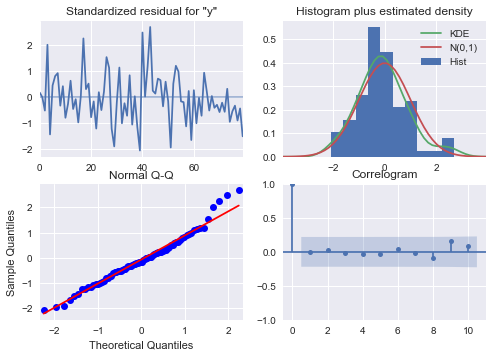

In [123]:
results_auto_SARIMA_spark.plot_diagnostics()
plt.show()

In [124]:
SARIMA_test.head()

Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

In [125]:
pred_dynamic = results_auto_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [126]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_spark = results_auto_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.05)

In [127]:
predicted_auto_SARIMA_spark.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1430.749854  431.198896     585.615548    2275.884161
1  1540.444729  458.362560     642.070618    2438.818839
2  1707.348305  460.141436     805.487663    2609.208948
3  1858.833607  466.711604     944.095672    2773.571543
4  1501.567686  467.014275     586.236527    2416.898846

In [128]:
# Extract the predicted and true values of our time series
spark_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_forecasted'] = predicted_auto_SARIMA_spark.predicted_mean
SARIMA_test.head()

Sparkling  spark_forecasted
Time_Stamp                             
1991-01-31       1902       1430.749854
1991-02-28       2049       1540.444729
1991-03-31       1874       1707.348305
1991-04-30       1279       1858.833607
1991-05-31       1432       1501.567686

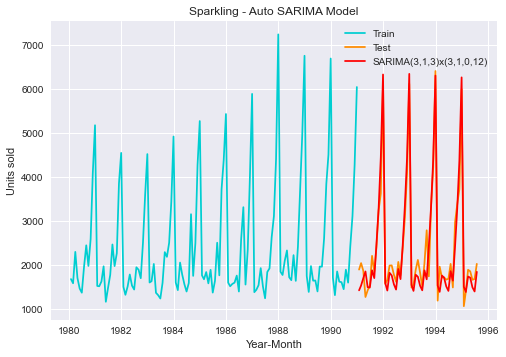

In [129]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_forecasted'], color='red', label='SARIMA(3,1,3)x(3,1,0,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Sparkling - Auto SARIMA Model')
plt.legend(loc='best')

In [130]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 331.642 and MAPE is 10.34


In [131]:
resultsDf_8_spark1 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Auto SARIMA(3,1,3)x(3,1,0,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark1])
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
Auto SARIMA(3,1,3)x(3,1,0,12)           331.642387      10.34
TES Alpha 0.11, Beta 0.06, Gamma 0.39   469.767970      16.40
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
SimpleAverage                          1275.081804      38.90
6 point TMA                            1283.927428      43.86
SES Alpha 0.049                        1316.035487      45.47
9 point TMA                            1346.278315      46.86
RegressionOnTime                       1389.135175      50.15
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 9.99e-05            2007.238526      68.23
NaiveModel                             3864.279352     152.87

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.
Let us look at the ACF and the PACF plots .

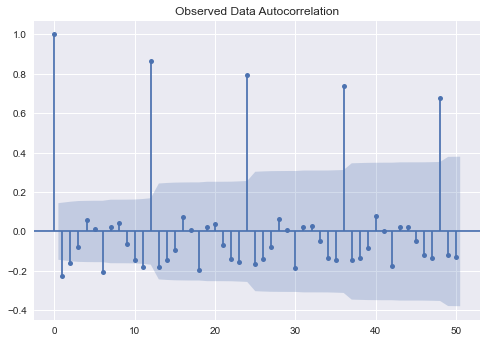

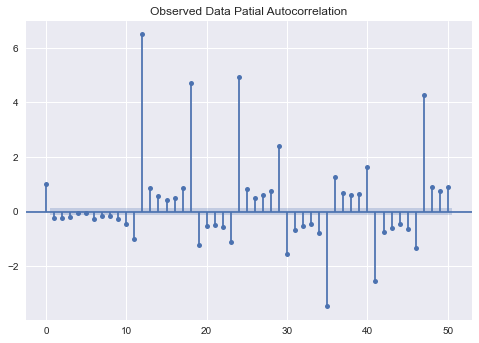

In [132]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Observed Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Observed Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off quickly. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

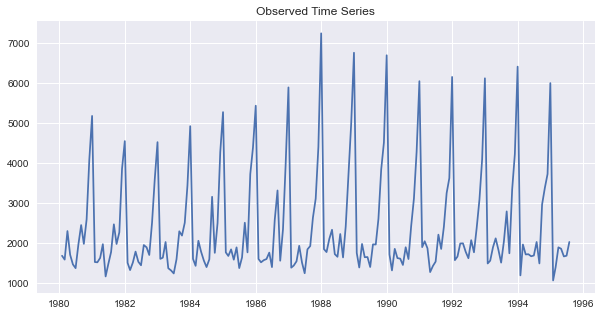

In [133]:
plt.figure(figsize=(10,5))
plt.plot(df['Sparkling'])
plt.title ('Observed Time Series');

We see that there is marginal trend and but have significant seasonality. So, now we take a seasonal differencing and check the series.

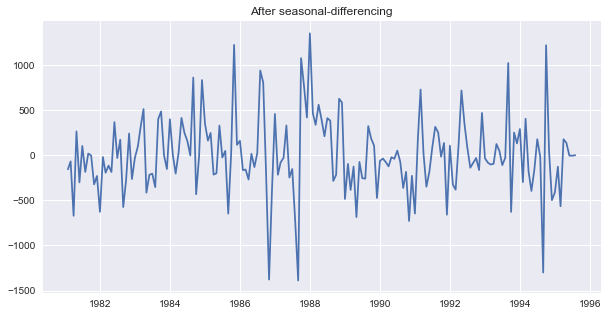

In [134]:
plt.figure(figsize=(10,5))
plt.plot(df['Sparkling'].diff(12).dropna())
plt.title ('After seasonal-differencing');

The marginal trend in the data is still seen

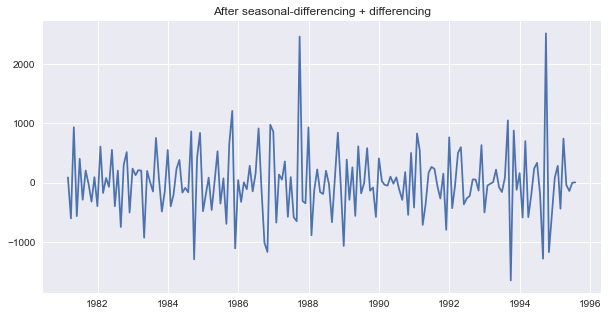

In [135]:
plt.figure(figsize=(10,5))
plt.plot((df['Sparkling'].diff(12).dropna()).diff().dropna())
plt.title ('After seasonal-differencing + differencing');

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

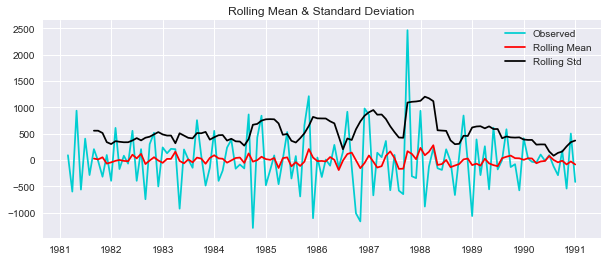

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [136]:
plt.figure(figsize=(10,4))
test_stationarity((SARIMA_train['Sparkling'].diff(12).dropna()).diff().dropna(), 'darkturquoise')

Checking the ACF and the PACF plots for the new modified Time Series.

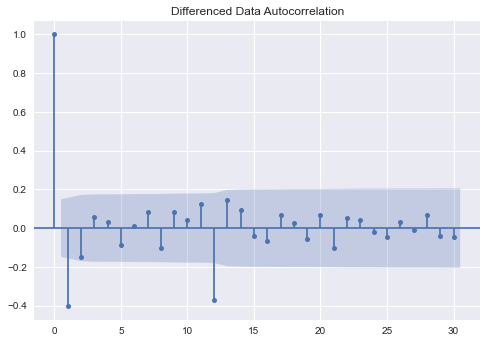

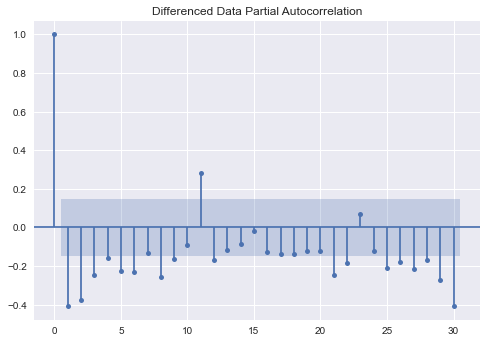

In [137]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Autocorrelation')
plot_pacf((df['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Partial Autocorrelation');

- Here we have taken alpha = 0.05 and seasonal period as 12


- From the PACF plot it can be seen that till 3rd lag its significant before cut-off, so AR term ‘p = 3’ is chosen. At seasonal lag of 12, it almost cuts off, so seasonal AR ‘P = 1’


- From ACF plot it can be seen that lag 1 is significant before it cuts off, so MA term ‘q = 1’ is selected and at seasonal lag of 12, a significant lag is apparent, so kept seasonal MA term ‘Q = 1’ initially


- The seasonal MA term ‘Q’ was later optimized to 2, by validating model performance, as the data might be under-differenced


- The final selected terms for SARIMA model is (3, 1, 1)x(0, 1, 2, 12)

In [138]:
import statsmodels.api as sm

manual_SARIMA_spark = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 1),
                                seasonal_order= (1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_spark = manual_SARIMA_spark.fit(maxiter=1000)
print(results_manual_SARIMA_spark.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -693.697
Date:                                 Sun, 10 Oct 2021   AIC                           1403.394
Time:                                         18:51:31   BIC                           1423.654
Sample:                                              0   HQIC                          1411.574
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.130      1.713      0.087      -0.032       0

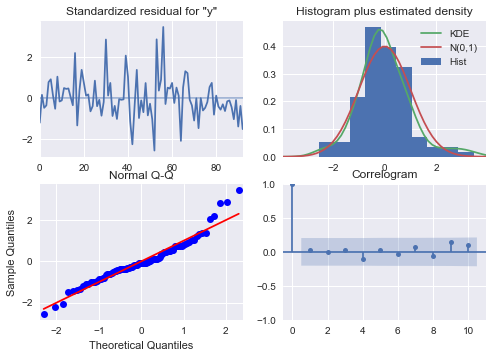

In [139]:
results_manual_SARIMA_spark.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

In [140]:
pred_dynamic = results_manual_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [141]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_spark = results_manual_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.5)

In [142]:
predicted_manual_SARIMA_spark.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1579.909525  416.594338     763.399626    2396.419423
1  1419.153441  429.113691     578.106061    2260.200820
2  1868.142987  429.104332    1027.113950    2709.172025
3  1731.471376  430.973026     886.779766    2576.162986
4  1659.821743  431.906018     813.301503    2506.341984

In [143]:
spark_manual_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_manual_forecasted'] = predicted_manual_SARIMA_spark.predicted_mean
SARIMA_test.head()

Sparkling  spark_forecasted  spark_manual_forecasted
Time_Stamp                                                      
1991-01-31       1902       1430.749854              1579.909525
1991-02-28       2049       1540.444729              1419.153441
1991-03-31       1874       1707.348305              1868.142987
1991-04-30       1279       1858.833607              1731.471376
1991-05-31       1432       1501.567686              1659.821743

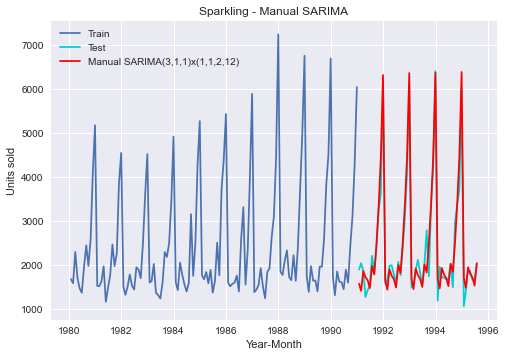

In [144]:
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test', color = 'darkturquoise')

plt.plot(SARIMA_test['spark_manual_forecasted'], color='red', label='Manual SARIMA(3,1,1)x(1,1,2,12)')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - Manual SARIMA')
plt.legend(loc='best')

In [145]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_manual_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_manual_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 324.107 and MAPE is 9.48


In [146]:
resultsDf_8_spark3 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Manual SARIMA(3,1,1)x(1,1,2,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark3])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.049                        1316.035487      45.47
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 9.99e-05            2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
TES Alpha 0.11, Beta 0.06, Gamma 0.39   469.767970      16.40
Auto SARIMA(3,1,3)x(3,1,0,12)           331.642387      10.34
Manual SARIMA(3,1,1)x(1,1,2,12)         324.106510       9.48

### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

We have build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data as below:

In [147]:
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.049                        1316.035487      45.47
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 9.99e-05            2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
TES Alpha 0.11, Beta 0.06, Gamma 0.39   469.767970      16.40
Auto SARIMA(3,1,3)x(3,1,0,12)           331.642387      10.34
Manual SARIMA(3,1,1)x(1,1,2,12)         324.106510       9.48

Sorting the results from all the models as per the RMSE values:

In [148]:
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
Manual SARIMA(3,1,1)x(1,1,2,12)         324.106510       9.48
Auto SARIMA(3,1,3)x(3,1,0,12)           331.642387      10.34
TES Alpha 0.11, Beta 0.06, Gamma 0.39   469.767970      16.40
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
SimpleAverage                          1275.081804      38.90
6 point TMA                            1283.927428      43.86
SES Alpha 0.049                        1316.035487      45.47
9 point TMA                            1346.278315      46.86
RegressionOnTime                       1389.135175      50.15
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 9.99e-05            2007.238526      68.23
NaiveModel                             3864.279352     152.87

Sorting the results from all the models as per the MAPE values:

In [149]:
spark_resultsDf.sort_values(by=['Test MAPE'])

Test RMSE  Test MAPE
Manual SARIMA(3,1,1)x(1,1,2,12)         324.106510       9.48
Auto SARIMA(3,1,3)x(3,1,0,12)           331.642387      10.34
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
TES Alpha 0.11, Beta 0.06, Gamma 0.39   469.767970      16.40
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
SimpleAverage                          1275.081804      38.90
6 point TMA                            1283.927428      43.86
SES Alpha 0.049                        1316.035487      45.47
9 point TMA                            1346.278315      46.86
RegressionOnTime                       1389.135175      50.15
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 9.99e-05            2007.238526      68.23
NaiveModel                             3864.279352     152.87

### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands

Text(0.5, 1.0, 'SPARKLING : Forecasts Vs Test Data')

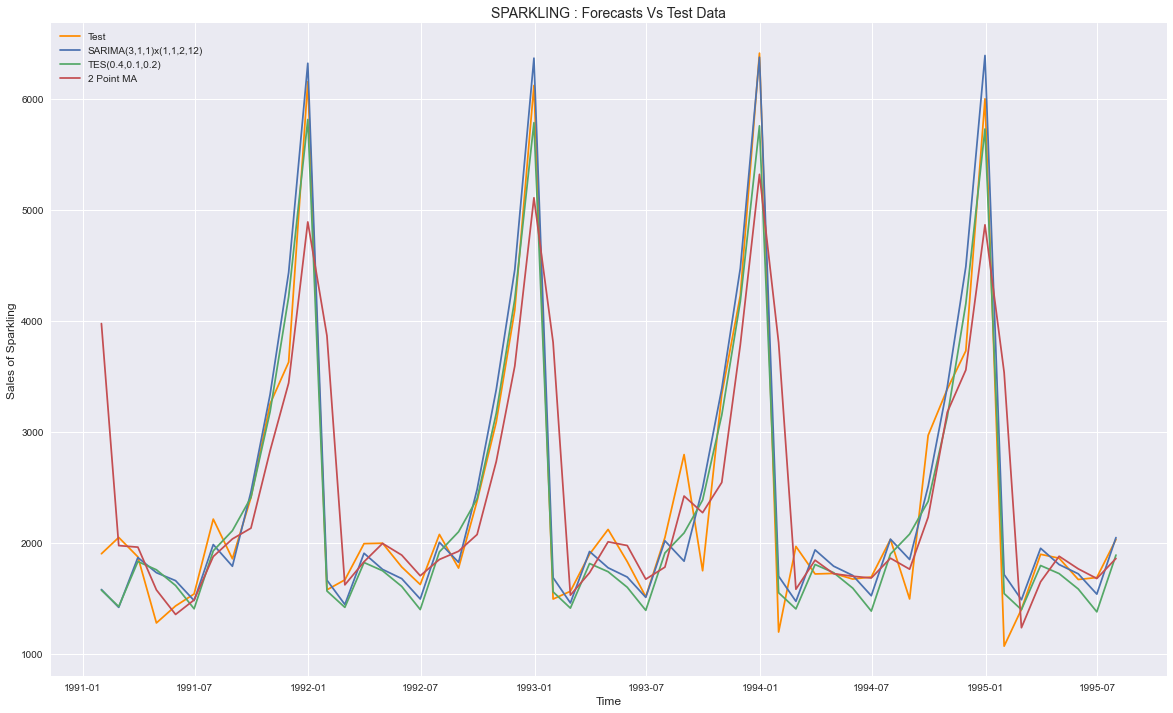

In [150]:
plt.figure(figsize=(20,12))

plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

#SARIMA
plt.plot(SARIMA_test['spark_manual_forecasted'],  label='SARIMA(3,1,1)x(1,1,2,12)')

#TES
plt.plot(TES_test['predict_spark',0.4,0.1,0.2],  label='TES(0.4,0.1,0.2)')

#MA
plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'],  label='2 Point MA')

plt.legend(loc='upper left')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : Forecasts Vs Test Data', fontsize=14)

In [151]:
model_TES_spark = ExponentialSmoothing(df['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_spark_fit = model_TES_spark.fit(smoothing_level=0.4,smoothing_slope=0.1,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_spark_forecast = model_TES_spark_fit.forecast(steps=12)

In [152]:
rmse_spark_tes_full = metrics.mean_squared_error(df['Sparkling'],model_TES_spark_fit.fittedvalues,squared=False)
mape_spark_tes_full = MAPE(df['Sparkling'],model_TES_spark_fit.fittedvalues)
print("TES forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_tes_full, mape_spark_tes_full))

TES forecast on the Sparkling Full Data:  RMSE is 377.290 and MAPE is 11.36


Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast using TES Model')

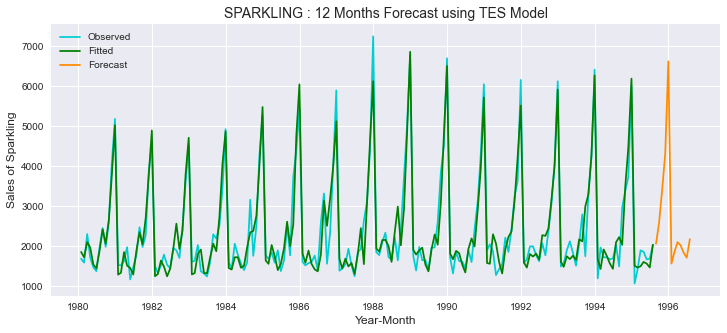

In [153]:
plt.figure(figsize=(12,5))

plt.plot(df['Sparkling'], label='Observed', color = 'darkturquoise')
plt.plot(model_TES_spark_fit.fittedvalues, label='Fitted', color = 'green')
plt.plot(TES_spark_forecast, label='Forecast', color = 'darkorange')
plt.legend(loc='upper left')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using TES Model', fontsize=14)


Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

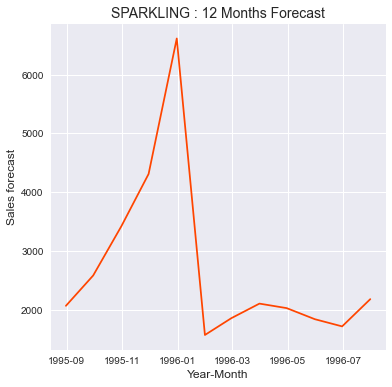

In [154]:
plt.figure(figsize=(6,6))
plt.plot(TES_spark_forecast, label='Forecast', color = 'orangered')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast', fontsize=14)

### Attempt SARIMA(3,1,3)x(1,1,2,12) for forecast

In [155]:
from warnings import filterwarnings
filterwarnings('ignore')

In [156]:
spark_full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_spark = spark_full_data_model.fit(maxiter=1000)
print(results_full_data_model_spark.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1078.437
Date:                                 Sun, 10 Oct 2021   AIC                           2176.875
Time:                                         18:52:05   BIC                           2206.711
Sample:                                     01-31-1980   HQIC                          2188.998
                                          - 07-31-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4229      0.086     -4.917      0.000      -0.591      -0

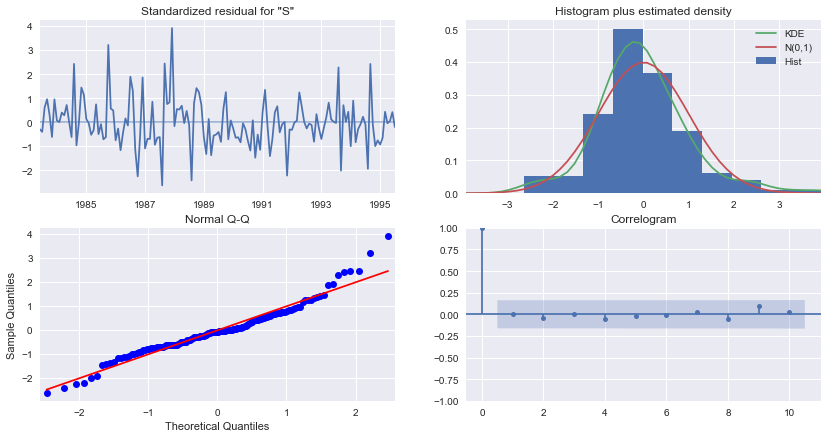

In [157]:
rcParams['figure.figsize'] = 14,7

results_full_data_model_spark.plot_diagnostics();

In [158]:
predicted_spark_SARIMA_full_data = results_full_data_model_spark.get_forecast(steps=12)

In [159]:
predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1873.543034  384.404018    1120.125004    2626.961064
1995-09-30  2444.931235  389.417467    1681.687025    3208.175446
1995-10-31  3312.891720  390.110811    2548.288580    4077.494860
1995-11-30  3994.799419  390.618837    3229.200566    4760.398272
1995-12-31  6084.234032  390.748039    5318.381948    6850.086116

In [160]:
rmse_spark_sarima_full = metrics.mean_squared_error(df['Sparkling'],results_full_data_model_spark.fittedvalues,squared=False)
mape_spark_sarima_full = MAPE(df['Sparkling'],results_full_data_model_spark.fittedvalues)
print("For SARIMA forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_sarima_full, mape_spark_sarima_full))

For SARIMA forecast on the Sparkling Full Data:  RMSE is 591.263 and MAPE is 14.86


#### Lets try predicting for 12 months into the future with appropriate confidence intervals/bands:

In [161]:
df.tail()

Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [162]:
# Getting dates for next 12 months 
pred_full_manual_SARIMA_date = predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

In [163]:
pred_full_manual_SARIMA_date

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1873.543034  384.404018    1120.125004    2626.961064
1995-09-30  2444.931235  389.417467    1681.687025    3208.175446
1995-10-31  3312.891720  390.110811    2548.288580    4077.494860
1995-11-30  3994.799419  390.618837    3229.200566    4760.398272
1995-12-31  6084.234032  390.748039    5318.381948    6850.086116
1996-01-31  1216.322059  390.942465     450.088907    1982.555212
1996-02-29  1640.826869  391.409026     873.679275    2407.974463
1996-03-31  1847.298264  391.648715    1079.680888    2614.915640
1996-04-30  1762.206859  391.764260     994.363020    2530.050699
1996-05-31  1708.567435  392.148600     939.970302    2477.164569
1996-06-30  1664.034999  392.528724     894.692837    2433.377161
1996-07-31  1961.427957  392.627650    1191.891903    2730.964011

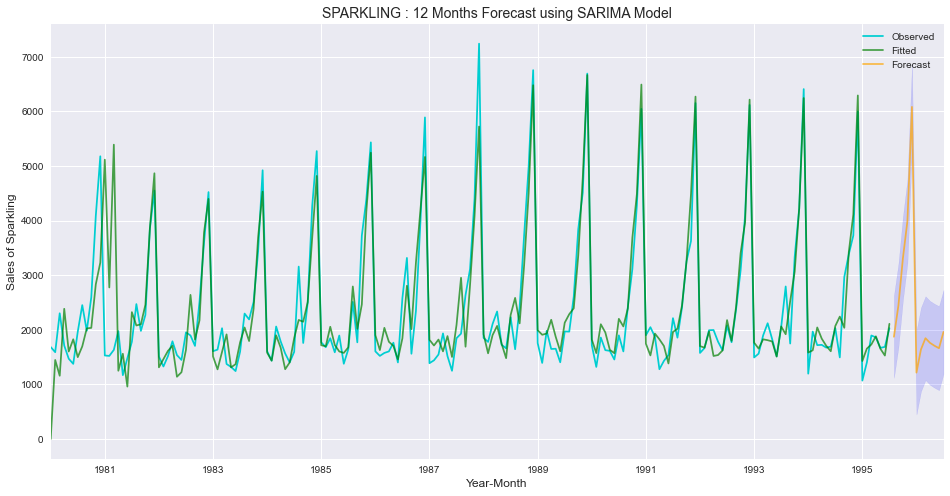

In [164]:
# plot the forecast along with the confidence band
plt.figure(figsize=(16,8))

axis = df['Sparkling'].plot(label='Observed', color = 'darkturquoise')
results_full_data_model_spark.fittedvalues.plot(ax=axis, label='Fitted', alpha=0.7, color = 'green')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'orange')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

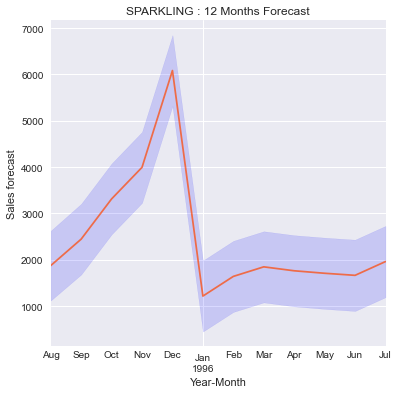

In [165]:
plt.figure(figsize=(6,6))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('SPARKLING : 12 Months Forecast', fontsize=12)

In [166]:
forecast = pd.DataFrame({'Sparkling':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast

Sparkling
1995-08-31    1873.54
1995-09-30    2444.93
1995-10-31    3312.89
1995-11-30    3994.80
1995-12-31    6084.23
1996-01-31    1216.32
1996-02-29    1640.83
1996-03-31    1847.30
1996-04-30    1762.21
1996-05-31    1708.57
1996-06-30    1664.03
1996-07-31    1961.43

In [167]:
forecast.describe()

Sparkling
count    12.000000
mean   2459.256667
std    1384.626967
min    1216.320000
25%    1697.435000
50%    1860.420000
75%    2661.920000
max    6084.230000

### 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

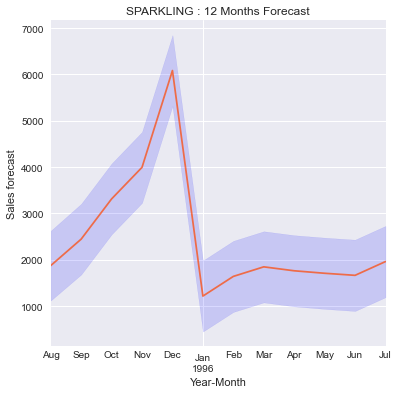

In [168]:
plt.figure(figsize=(6,6))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('SPARKLING : 12 Months Forecast', fontsize=12)

In [169]:
forecast = pd.DataFrame({'Sparkling':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast

Sparkling
1995-08-31    1873.54
1995-09-30    2444.93
1995-10-31    3312.89
1995-11-30    3994.80
1995-12-31    6084.23
1996-01-31    1216.32
1996-02-29    1640.83
1996-03-31    1847.30
1996-04-30    1762.21
1996-05-31    1708.57
1996-06-30    1664.03
1996-07-31    1961.43

- The model forecasts sale of 29510 units of Sparkling wine in 12 months intofuture. Which is an average sale of 2459 units per month


- The seasonal sale in December 1995 will hit a maximum of 6084 units, before it drops to the lowest sale in January 1996; at 1216 units.


- The wine company is recommended to ramp up their procurement and production line in accordance with the above forecasts for the third quarter of 1995 (October, November and December), which is a total of 13,392 units of sparkling wine is expected to be sold.


- The forecast also indicates that the year-on-year sale of sparkling wine is not showing an upward trend. The winery must adopt innovative marketing skills to improve the sale compared to previous years


- Adding more exogenous variable into the timeseries data can improve forecasts.